**DEFAULT OF CREDIT CARD CLIENTS**



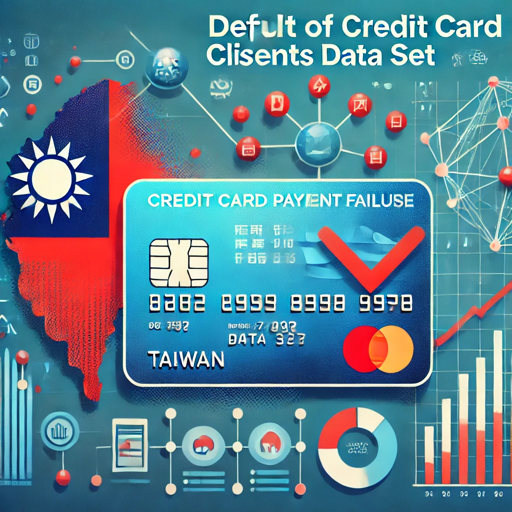

**Introduction to the Project**

Defaulting on credit cards is a significant issue that results in adverse consequences for both banks and customers. When a customer fails to meet their payment obligations, banks incur financial losses, while the customer risks losing their credibility for future transactions. This situation often leads to collection calls and, as a last resort, legal proceedings. To prevent such complications, effective methods for predicting credit card defaults are essential. Consequently, credit card default prediction is a critical, challenging, and valuable task that must be addressed.

In recent years, credit card issuers in Taiwan have faced a cash and credit card debt crisis, with delinquencies anticipated to peak in the third quarter of 2006. To increase their market share, many banks in Taiwan over-issued credit and cash cards to unqualified applicants. Simultaneously, numerous cardholders, regardless of their repayment capabilities, excessively used their credit cards for consumption, leading to substantial credit and cash-card debt. This crisis has undermined consumer confidence in financial systems and poses a significant challenge for both banks and cardholders.

**Problem Statement**

This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification-credible or non-credible clients.The K-S chart can be used to evaluate which customers will default on their credit card payments.

**Objective**


The objective is to develop a predictive model that forecasts whether a client will default on their credit card payment in the next month. This insight can support decision-making related to risk management and credit approval processes.

Data Description

The dataset, sourced from the UCI Machine Learning Repository, is titled the "Default of Credit Card Clients" dataset and contains 30,000 observations with 23 features. These features include demographic information, past payment behavior, and the target variable: "default payment next month".

The columns in the dataset are:

ID: A unique identifier for each customer.

LIMIT_BAL: The credit limit assigned to each customer.

SEX: The gender of the customer (1 = male, 2 = female).

EDUCATION: The education level of the customer (1 = graduate school; 2 = university; 3 = high school; 4 = others).

MARRIAGE: The marital status of the customer (1 = married; 2 = single; 3 = others).

AGE: The age of the customer(year).

PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6: The past monthly payment records (from April to September, 2005) as follows: PAY_0 = the repayment status in September, 2005; PAY_1 = the repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

BILL_AMT1, BILL_AMT2, BILL_AMT3,BILL_AMT4, BILL_AMT5, BILL_AMT6: Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005.

PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005.

default payment next month: Whether the customer defaulted on their payment the next month (1 = defaulted, 0 = not defaulted).

**IMPORT LIBRARIES**

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

## Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

#Import necessary statistical libraries
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import ks_2samp

#import necessary libraries  for feature engineering
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

#import libraries for  machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

#import libraries for hyperparameter tuning and metric score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score,roc_auc_score,precision_score, recall_score, classification_report, RocCurveDisplay, ConfusionMatrixDisplay, confusion_matrix


**DATASET LOADING**

In [2]:
df=pd.read_csv("MainProject.csv")

**Dataset First View**

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Dataset Rows & Columns count**


In [4]:
df.shape

(30000, 25)

The dataset has 30000 rows and 25 columns

**Dataset Information**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

The info() method provides a detailed overview of the DataFrame, confirming that it is a Pandas DataFrame containing a total of 30,000 entries indexed from 0 to 29,999. The dataset comprises 25 columns, all of which have the data type int64, indicating that they contain integer values. Each column contains 30,000 non-null values, signifying that there are no missing values in the dataset.

In [6]:
df.describe( include = 'all').T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


**Duplicate Values**

In [8]:
df.duplicated().sum()

0

The df.duplicated().sum() method checks for duplicate rows in the DataFrame. The output indicates that there are 0 duplicate entries, confirming that each row in the dataset is unique.

**Missing Values/Null Values**

In [9]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


The df.isnull().sum() method provides a comprehensive count of missing values for each column in the DataFrame. The output indicates that all 25 columns have a count of 0 missing values, confirming that the dataset is complete and contains no null entries.

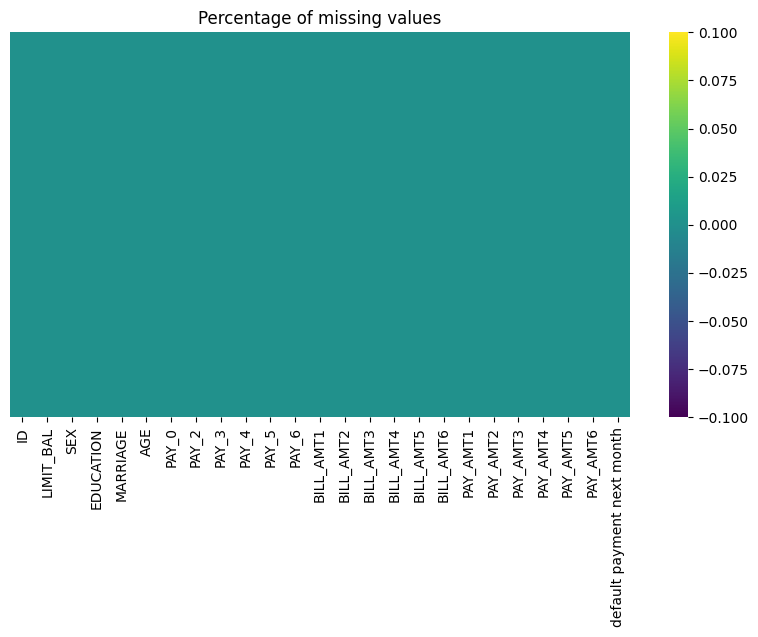

In [10]:
#Plot to check the null values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Percentage of missing values')
plt.show()

**UNDERSTANDING THE VARIABLES**

In [11]:
# Dataset Columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


**Variables Description**:
As the response variable in this study, a binary variable, default payment (Yes = 1, No = 0), was used. This study analysed the literature and used the following variables as explanatory variables:
* ID: A unique identifier for each customer.

* LIMIT_BAL: The credit limit assigned to each customer.

* SEX: The gender of the customer (1 = male, 2 = female).

* EDUCATION: The education level of the customer (1 = graduate school; 2 = university; 3 = high school; 4 = others).

* MARRIAGE: The marital status of the customer (1 = married; 2 = single; 3 = others).

* AGE: The age of the customer(year).

* **History of past payment**

This information outlines the repayment history of past payments tracked monthly from April to September 2005. The repayment status for each month is recorded using the following scale:

-2: No spending during the month.

-1: Paid in full.

0: Use of revolving credit (minimum payment made).

1: Payment delayed by 1 month.

2: Payment delayed by 2 months.

...: Incremental delays correspond to the value.

8: Payment delayed by 8 months.

9: Payment delayed by 9 months or more.


The features in the dataset are as follows:

PAY_0: Repayment status for September 2005.

PAY_2: Repayment status for August 2005.

PAY_3: Repayment status for July 2005.

PAY_4: Repayment status for June 2005.

PAY_5: Repayment status for May 2005.

PAY_6: Repayment status for April 2005.

This information provides a detailed timeline of customer payment behaviors for analysis.


* **Amount of bill statement (NT dollar)**:

BILL_AMT1: Amount of bill statement in September, 2005

BILL_AMT2: Amount of bill statement in August, 2005

BILL_AMT3: Amount of bill statement in July, 2005

BILL_AMT4: Amount of bill statement in June, 2005

BILL_AMT5: Amount of bill statement in May, 2005

BILL_AMT6: Amount of bill statement in April, 2005


* **Amount of previous payment (NT dollar)**:


PAY_AMT1: Amount of previous payment in September, 2005

PAY_AMT2: Amount of previous payment in August, 2005

PAY_AMT3: Amount of previous payment in July, 2005

PAY_AMT4: Amount of previous payment in June, 2005

PAY_AMT5: Amount of previous payment in May, 2005

PAY_AMT6: Amount of previous payment in April, 2005


* default.payment.next.month: Default payment (1=yes, 0=no)

**Check Unique Values for each variable**

In [15]:
# Check Unique Values for each variable.
for i in df.columns.to_list():
  print("the unique values number count",i,'is' ,df[i].nunique())

the unique values number count ID is 30000
the unique values number count LIMIT_BAL is 81
the unique values number count SEX is 2
the unique values number count EDUCATION is 7
the unique values number count MARRIAGE is 4
the unique values number count AGE is 56
the unique values number count PAY_0 is 11
the unique values number count PAY_2 is 11
the unique values number count PAY_3 is 11
the unique values number count PAY_4 is 11
the unique values number count PAY_5 is 10
the unique values number count PAY_6 is 10
the unique values number count BILL_AMT1 is 22723
the unique values number count BILL_AMT2 is 22346
the unique values number count BILL_AMT3 is 22026
the unique values number count BILL_AMT4 is 21548
the unique values number count BILL_AMT5 is 21010
the unique values number count BILL_AMT6 is 20604
the unique values number count PAY_AMT1 is 7943
the unique values number count PAY_AMT2 is 7899
the unique values number count PAY_AMT3 is 7518
the unique values number count PAY_A

**DATA WRANGLING**

In [17]:
#creating a copy of dataset`
credit_df = df.copy()

In [18]:

credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [19]:
# Write the code to make the dataset analysis ready.
credit_df = df.copy()

# renaming the columns to appopriate names
# renaming dependendent Variable
credit_df.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)

#Changing name of some columns for simplicity and better understanding
credit_df.rename(columns={'PAY_0':'REPAY_STS_SEPT','PAY_2':'REPAY_STS_AUG','PAY_3':'REPAY_STS_JUL','PAY_4':'REPAY_STS_JUN','PAY_5':'REPAY_STS_MAY','PAY_6':'REPAY_STS_APR'},inplace=True)
credit_df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
credit_df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

#Dropping id from dataset
credit_df.drop('ID',axis =1 ,inplace = True)

In [20]:
df_credit = credit_df.copy()
#replacing values with there labels
df_credit.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
df_credit.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'others',5 : 'others',6 : 'others',0 : 'others'}}, inplace=True)
df_credit.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'others',0 : 'others'}}, inplace = True)
df_credit.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [21]:
# data frame for EDA analysis
df_credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_STS_SEPT,REPAY_STS_AUG,REPAY_STS_JUL,REPAY_STS_JUN,REPAY_STS_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,20000,Female,University,Married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,Yes
1,120000,Female,University,Single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,90000,Female,University,Single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,50000,Female,University,Married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,50000,Male,University,Married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


**Data Manipulations Performed and Insights Gained**

Renaming Variables:

Dependent variables and feature names were renamed to improve clarity and comprehension of the dataset.

Conversion of Numerical Values to Categorical Values:

Certain numerical features were transformed into categorical values for better understanding:

* Gender:

1 = Male

2 = Female

* Education:

1 = Graduate School

2 = University

3 = High School

4 = Others

* Marital Status:

1 = Married

2 = Single

3 = Others

These changes enhance interpretability, making the data easier to analyze and understand.

**Data Visualization, Storytelling, and Experimentation with Charts**:

Exploring and analyzing the relationships between variables using visual representations.

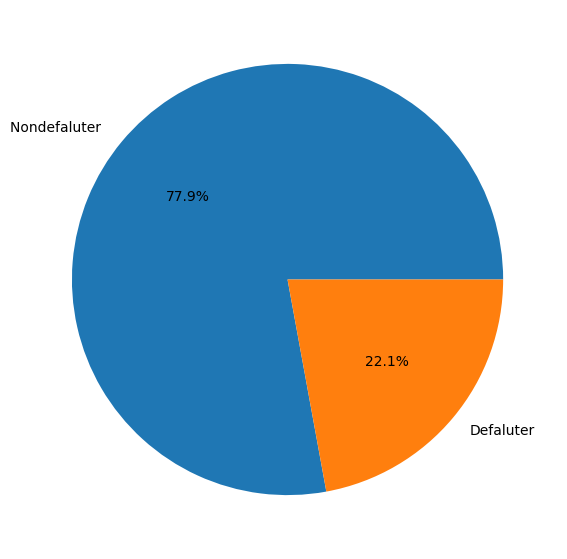

In [26]:
# Visualization code caluaculation of the non defaulter precenatge
plt.figure(figsize=(10,7))
plt.pie(x=df_credit['IsDefaulter'].value_counts(), labels = ['Nondefaluter ','Defaluter'] ,autopct ='%1.1f%%')
plt.show()

**Choice of Char**:

* A pie chart was selected to visually summarize nominal data, showcasing the percentage distribution of a categorical variable.

* Example: Distribution of payment defaults (Yes/No).

**Insights Gained**:

* The chart reveals that 22% of the customers are defaulters, while 78% are non-defaulters.

* This indicates a significant imbalance between the two classes.

**Actionable Recommendations**:

* Balance the dataset before training the model to ensure fair representation of both classes.

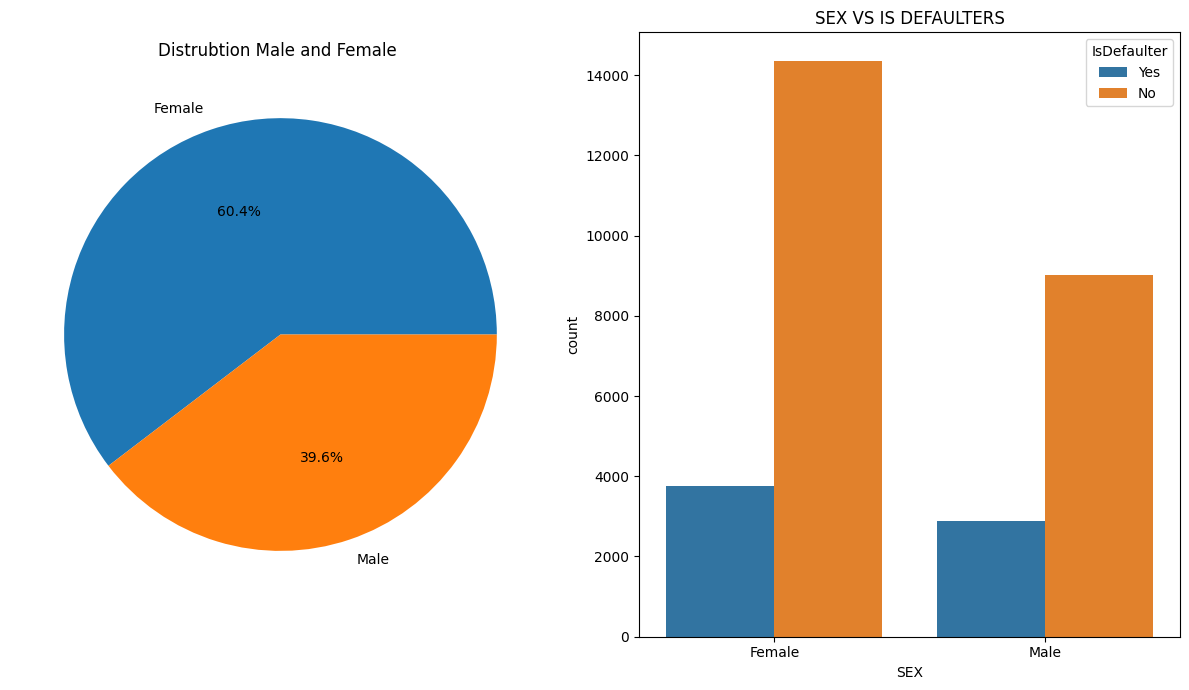

In [27]:
# Visualization of gender column
fig,ax= plt.subplots(1,2,figsize=(12,7))
#univaraite analysyis of gender column
ax[0].pie(x=df_credit['SEX'].value_counts(),labels=['Female','Male'],autopct='%1.1f%%')
ax[0].set_title('Distrubtion Male and Female ')
#bi-Varaite analysis SEX VS defaluters
sns.countplot(x=df_credit['SEX'],hue=df_credit['IsDefaulter'],data=df_credit,ax= ax[1])
ax[1].set_title('SEX VS IS DEFAULTERS')
ax[1].set_xlabel('SEX')
ax[1].set_ylabel('count')
plt.tight_layout()
plt.show()

In [28]:
TEST = df_credit.groupby(by=['SEX','IsDefaulter'])
count_values = TEST['IsDefaulter'].count()
count_values

SEX     IsDefaulter
Female  No             14349
        Yes             3763
Male    No              9015
        Yes             2873
Name: IsDefaulter, dtype: int64

**Choice of Charts**:

* Pie Chart: Used to analyze the percentage distribution of a feature.

* Bar Chart: Used to compare feature column values with the dependent variable.

**Insights from the Charts**:

* Female customers are more numerous than male customers.

* Among defaulters, there are 3763 female customers and 2874 male customers.

**Business Impact**:

* Positive Impact: Female customers are better customers, as the majority of non-defaulters belong to the female category.

* No negative impact identified.

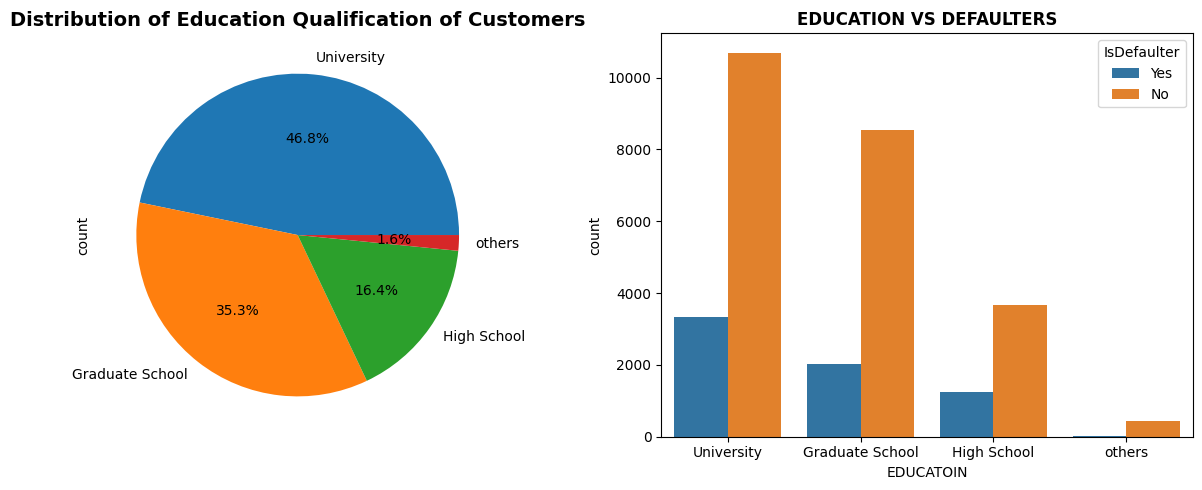

In [29]:
# Chart of EDUCATION COLUMN VS DEFAULTERS
fig,ax=plt.subplots(1,2,figsize=(12,5))
#univaraite analysis of Education column
value_counts=df_credit['EDUCATION'].value_counts()
value_counts.plot(kind='pie',ax=ax[0],autopct='%1.1f%%')
ax[0].set_title('Distribution of Education Qualification of Customers',fontsize=14,fontweight='bold')
#BiVaraite analyis of Education vs Defaulters
sns.countplot(x='EDUCATION',hue='IsDefaulter',data =df_credit,ax=ax[1])
ax[1].set_title('EDUCATION VS DEFAULTERS',fontsize=12,fontweight='bold')
ax[1].set_xlabel('EDUCATOIN')
ax[1].set_ylabel('count')
plt.tight_layout()
plt.show()


In [30]:
TEST = df_credit.groupby(by=['EDUCATION','IsDefaulter'])
count_values = TEST['IsDefaulter'].count()
count_values

EDUCATION        IsDefaulter
Graduate School  No              8549
                 Yes             2036
High School      No              3680
                 Yes             1237
University       No             10700
                 Yes             3330
others           No               435
                 Yes               33
Name: IsDefaulter, dtype: int64

**Choice of Charts**:

* Pie Chart: Used to summarize nominal data and display the values of a categorical variable.
* Countplot: Used to show the number of occurrences of observations in a categorical variable, visualized as a bar chart.

**Insights from the Charts**:

* Most customers are university graduates, followed by graduate school pass-outs.
* Most defaulters are also university graduates; however, university graduates have a lower default ratio compared to other groups.
* High school pass-outs have the highest default ratio.

**Business Impact**:

* Positive Impact: Banks can focus on university and graduate school pass-outs, as they form the majority of credit card holders.
* No Focus Needed: High school pass-outs have a low source of income and a high default ratio, so targeting this group is not beneficial for business growth.

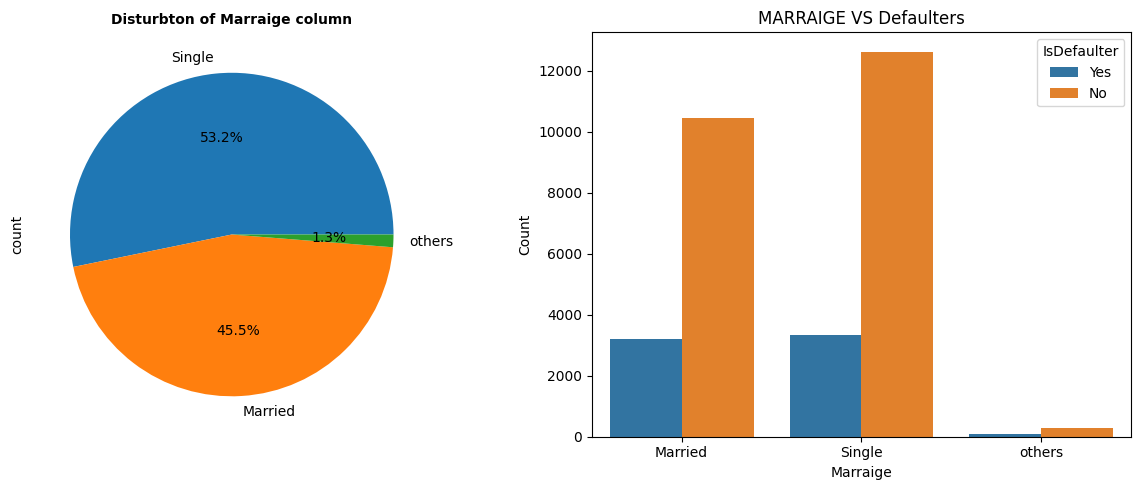

In [31]:
# Visualization of Marraige column
fig,ax=plt.subplots(1,2,figsize=(12,5))
#univaraite analyis of Marraige coulmn
df_credit['MARRIAGE'].value_counts().plot(kind='pie',ax=ax[0],autopct='%1.1f%%')
ax[0].set_title('Disturbton of Marraige column',fontsize=10,fontweight='bold')
#bi-varaie analysis of Marriage vs Isdefaulters
sns.countplot(x='MARRIAGE',hue=df_credit['IsDefaulter'],data =df_credit,ax=ax[1])
ax[1].set_title('MARRAIGE VS Defaulters')
ax[1].set_xlabel('Marraige')
ax[1].set_ylabel('Count')
plt.tight_layout()
plt.show()


In [32]:
Distrubtion_stats = df_credit.groupby(by=['MARRIAGE','IsDefaulter'])
Count=Distrubtion_stats['IsDefaulter'].value_counts()
Count

MARRIAGE  IsDefaulter
Married   No             10453
          Yes             3206
Single    No             12623
          Yes             3341
others    No               288
          Yes               89
Name: count, dtype: int64

**Choice of Charts**:

* Pie Chart: Used to summarize nominal data and display values of a categorical variable.
* Countplot: Used to show the number of occurrences of observations in a categorical variable, visualized as a bar chart.

**Insights from the Charts**:

* The majority of cardholders are single.
* Married individuals have a higher default ratio.

**Business Impact**:

* Positive Impact: Single individuals spend more and use credit cards more frequently, making them a key target group to enhance sales.

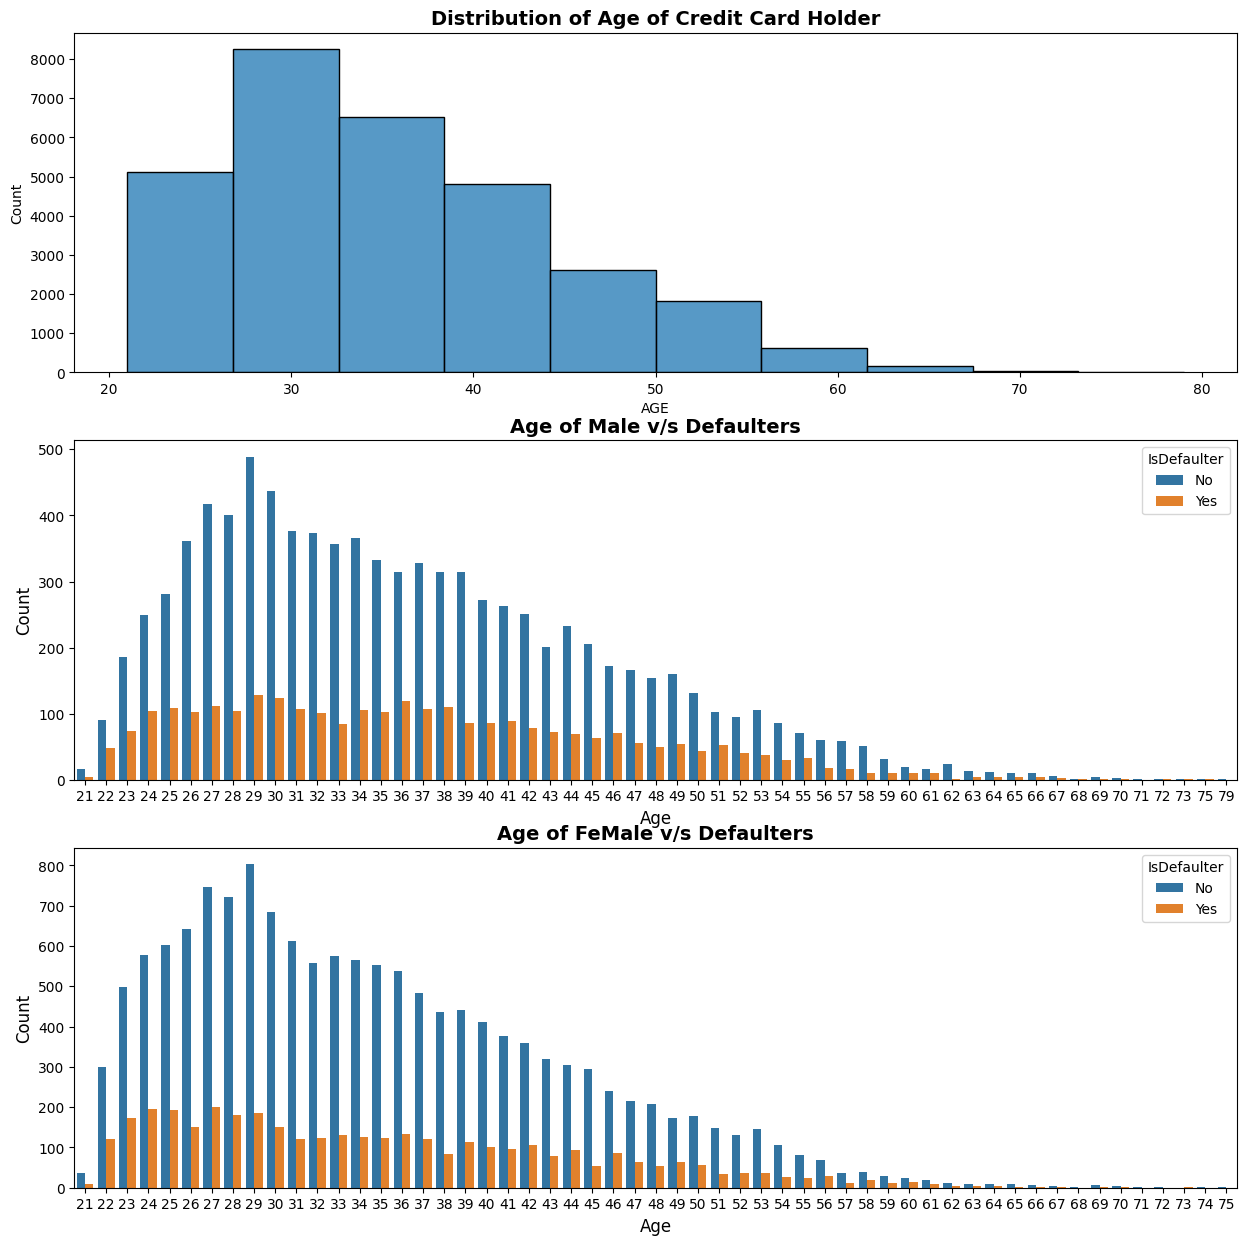

In [33]:
# Visualization of Age column

fig,ax=plt.subplots(3,1,figsize=(15,15))
#univariate analysis-distribution of Marriage
age_dist=sns.histplot(x=df_credit['AGE'],ax=ax[0],bins=10)
age_dist.set_title('Distribution of Age of Credit Card Holder',fontsize=14,fontweight='bold')
#Create two dataframe of male and female
Age_male=df_credit[df_credit['SEX']=='Male']
Age_female=df_credit[df_credit['SEX']=='Female']
sns.countplot(x = 'AGE',hue = 'IsDefaulter',data = Age_male,ax=ax[1])
#plot age of male card holder vs Defaulter
ax[1].set_title('Age of Male v/s Defaulters', fontsize = 14, fontweight = 'bold')
ax[1].set_xlabel('Age',fontsize = 12)
ax[1].set_ylabel('Count',fontsize=12)
#plot age of female card holder vs Defaulter
sns.countplot(x = 'AGE',hue = 'IsDefaulter',data = Age_female,ax=ax[2])
ax[2].set_title('Age of Female v/s Defaulters', fontsize = 14, fontweight = 'bold')
ax[2].set_xlabel('Age',fontsize = 12)
ax[2].set_ylabel('Count',fontsize=12)
plt.show()

**Choice of Charts**:

* Histogram: Used to illustrate the distribution of one or more variables by counting data that fall into discrete bins.
* Countplot: Used to display the number of occurrences of observations in a categorical variable, visualized as a bar chart.

**Insights from the Charts**:

* The majority of credit card holders are between 25-30 years old.
* The number of credit card holders decreases above the age of 60.
* The default ratio for male and female defaulters is similar in the 25-30 age range.
* The default ratio increases for individuals above 50 years old.

**Business Impact**:

* Negative Impact: Credit card issuances should be carefully reviewed for individuals under 25 and over 60, as they represent a higher default risk, which could negatively affect business growth.

Text(0, 0.5, 'Count')

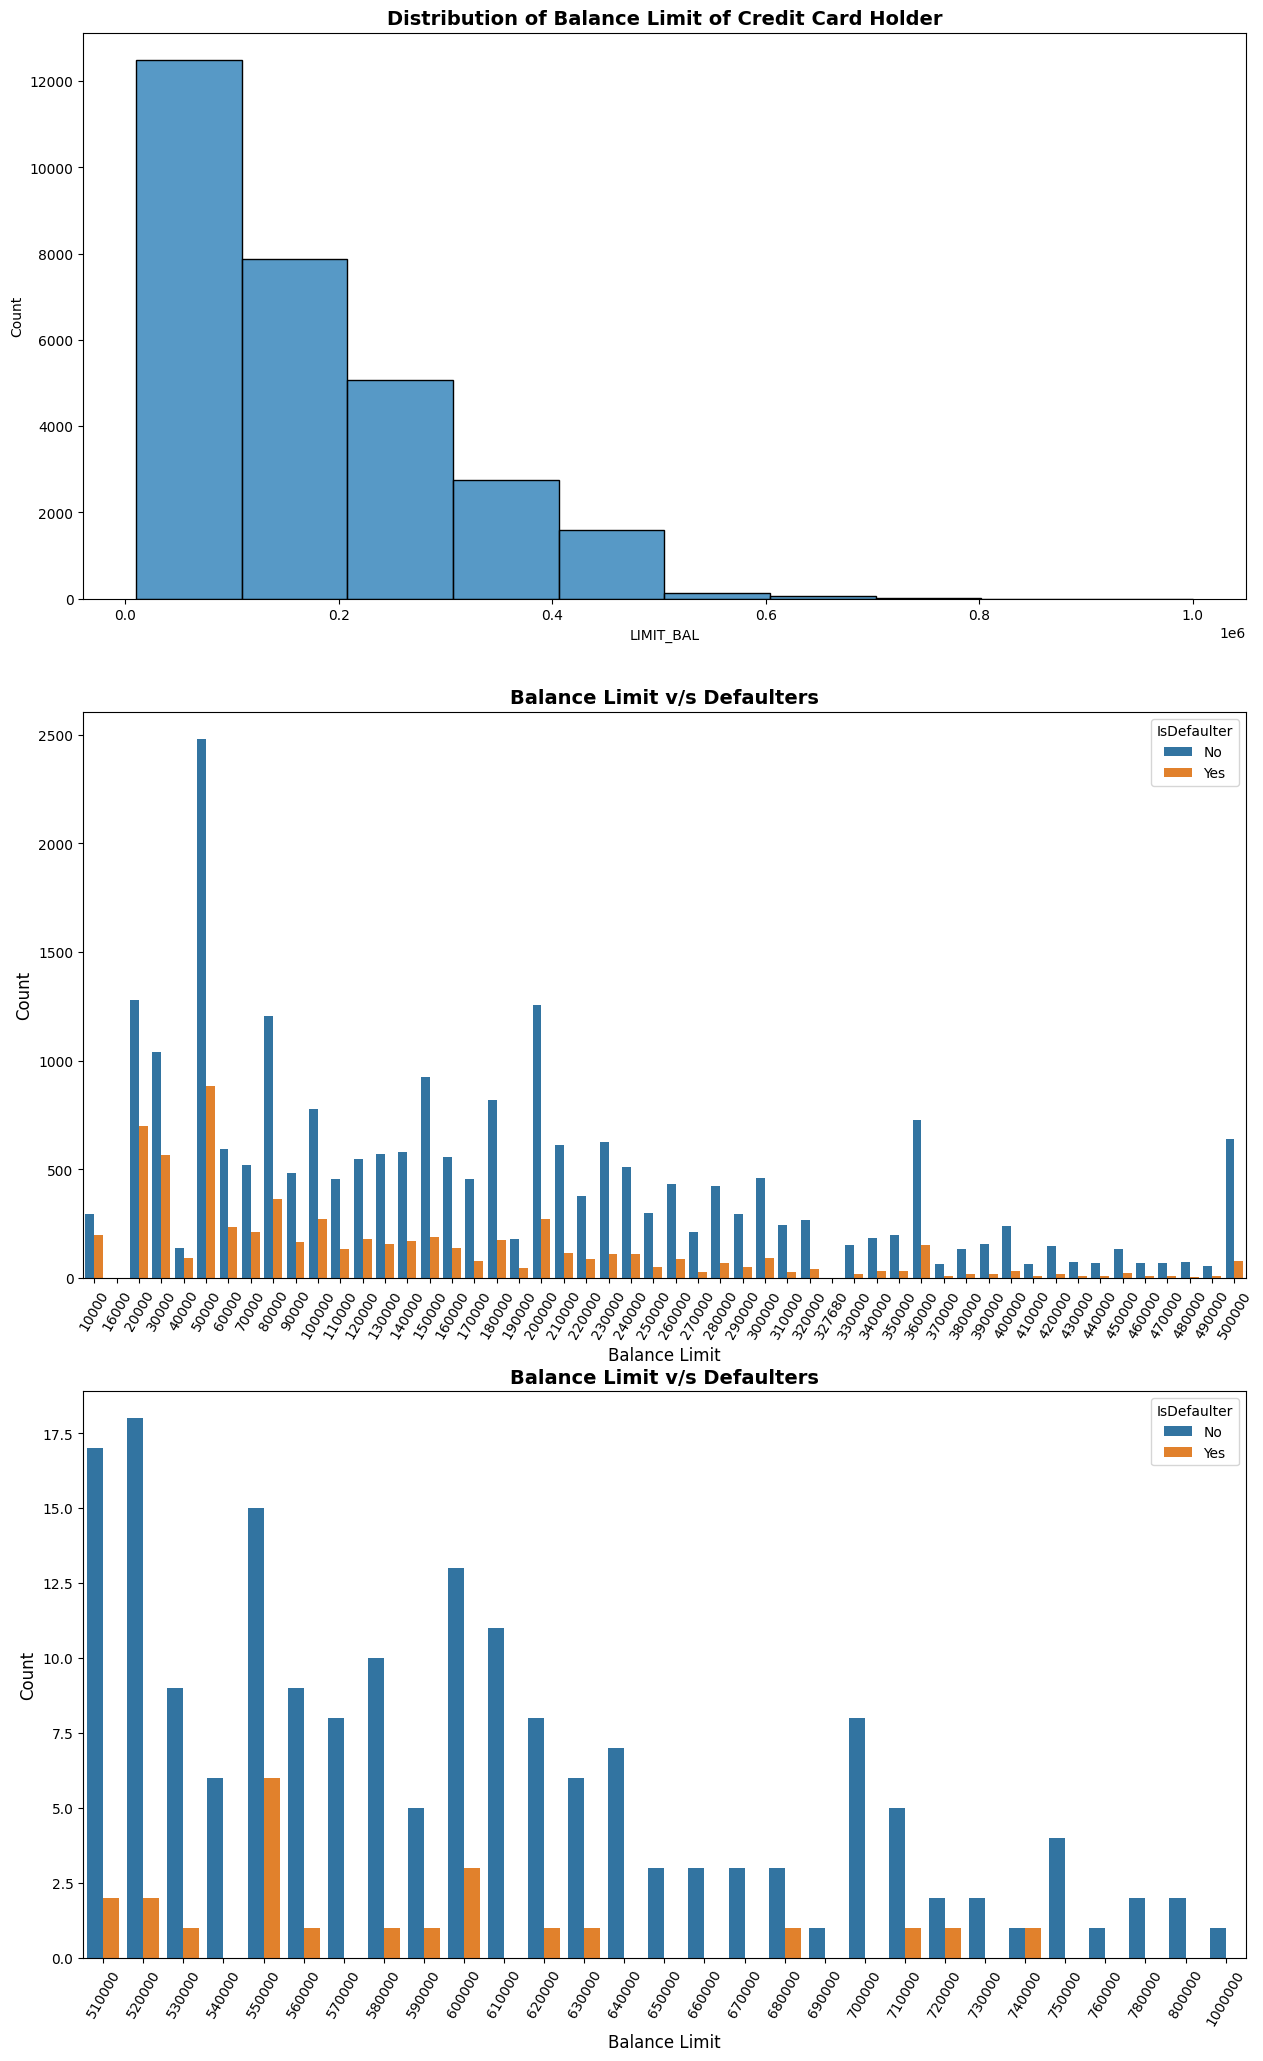

In [34]:
#Visualisation of Default payment next month Column

fig,ax=plt.subplots(3,1,figsize=(15,25))
#univariate analysis-distribution of Marriage
age_dist=sns.histplot(x=df_credit['LIMIT_BAL'],ax=ax[0],bins=10)
age_dist.set_title('Distribution of Balance Limit of Credit Card Holder',fontsize=14,fontweight='bold')
Limit_1=df_credit[df_credit['LIMIT_BAL']<=500000]
Limit_2=df_credit[df_credit['LIMIT_BAL']>500000]
#plot age of male card holder vs Defaulter
sns.countplot(x = 'LIMIT_BAL',hue = 'IsDefaulter',data = Limit_1,ax=ax[1])
ax[1].set_title('Balance Limit v/s Defaulters', fontsize = 14, fontweight = 'bold')
ax[1].tick_params(axis='x', labelrotation= 60)
ax[1].set_xlabel('Balance Limit',fontsize = 12)
ax[1].set_ylabel('Count',fontsize=12)
#plot age of male card holder vs Defaulter
sns.countplot(x = 'LIMIT_BAL',hue = 'IsDefaulter',data = Limit_2,ax=ax[2])
ax[2].set_title('Balance Limit v/s Defaulters', fontsize = 14, fontweight = 'bold')
ax[2].tick_params(axis='x', labelrotation= 60)
ax[2].set_xlabel('Balance Limit',fontsize = 12)
ax[2].set_ylabel('Count',fontsize=12)

**Choice of Charts**:

* Histogram: Used to count the number of data points that fall into discrete bins, illustrating the distribution of one or more variables.
* Countplot: Used to display the number of occurrences of observations in a categorical variable, visualized as a bar chart.

**Insights from the Charts**:

* Most credit card limits are below 100,000.
* Very few credit card limits exceed 500,000.
* The default ratio is high when the credit limit is less than or equal to 50,000.
* The default ratio is exceptionally high for credit limits of 550,000 and 600,000.

**Business Impact**:

* Negative Impact: Customers with credit limits above 50,000 are more likely to default. The bank should consider charging them for defaults and potentially reducing their credit limits to mitigate business risks.

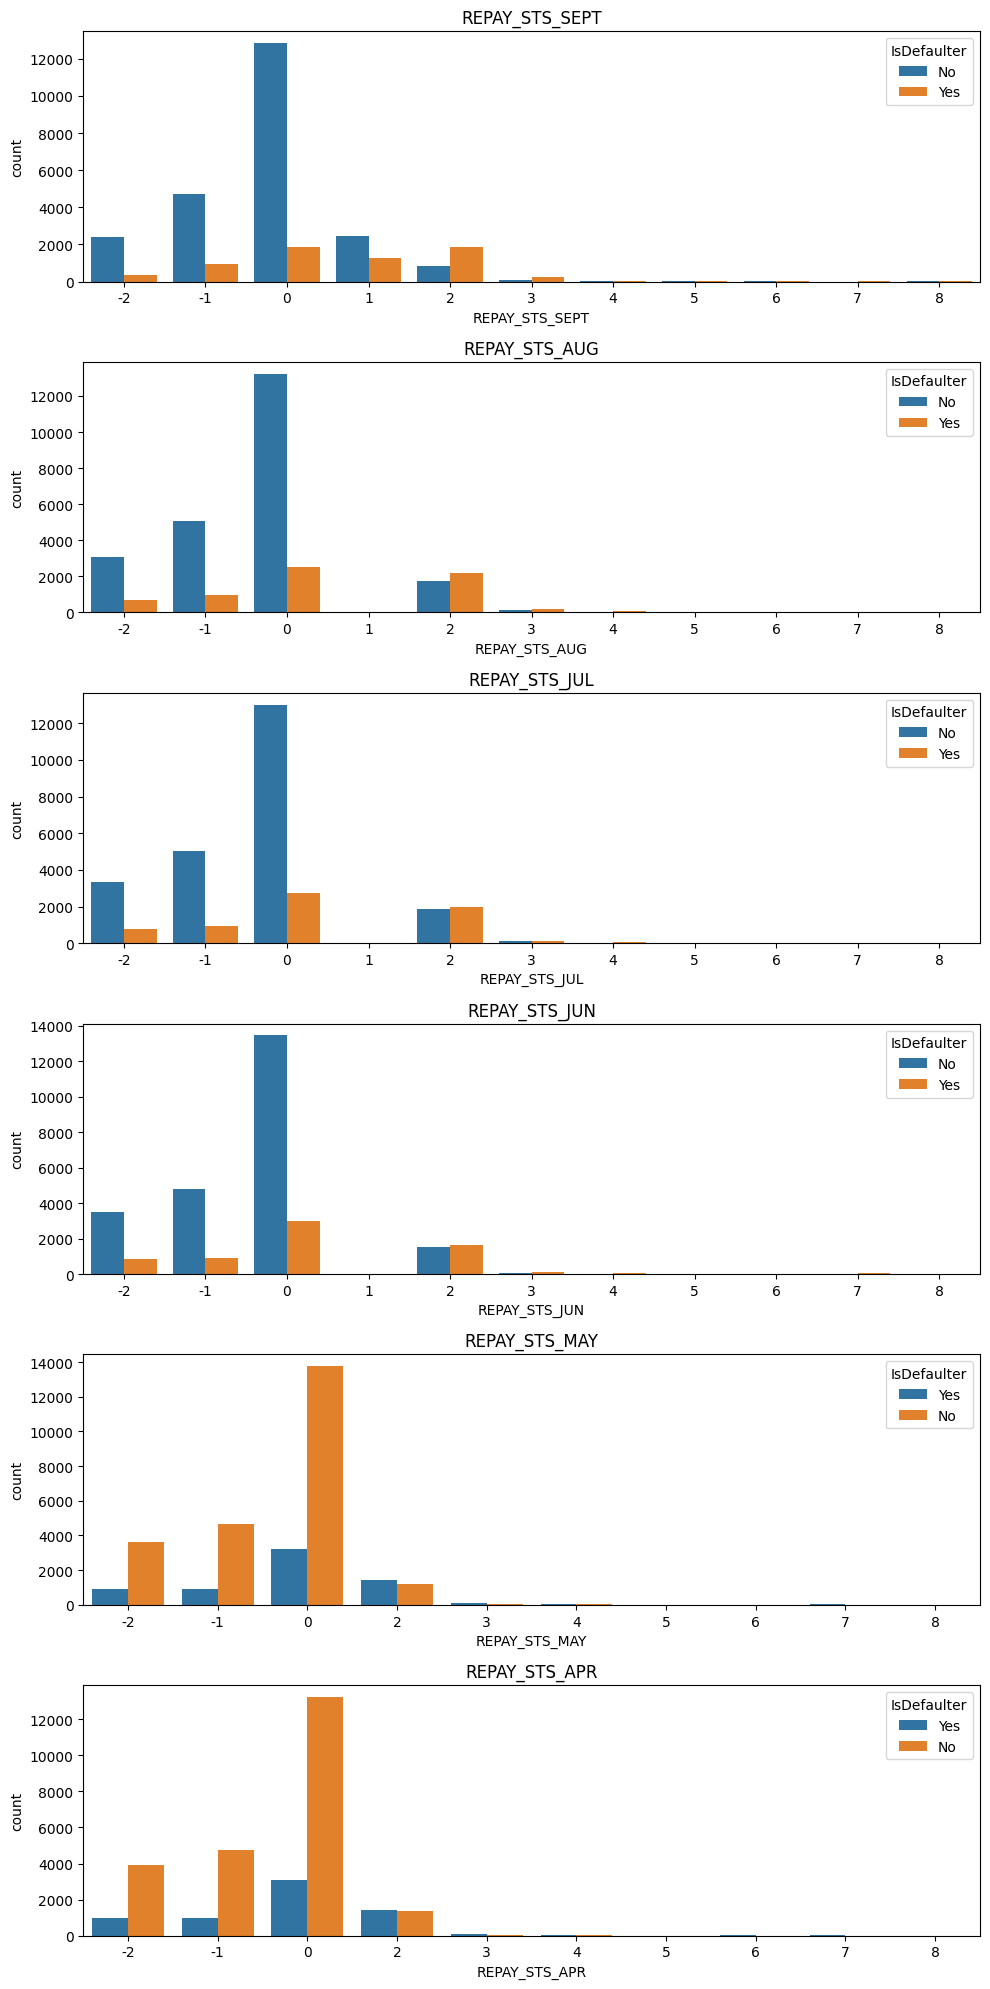

In [35]:
# Visualization of Monthly repayment status vs Defaluters

Repay_col = ['REPAY_STS_SEPT',	'REPAY_STS_AUG',	'REPAY_STS_JUL',	'REPAY_STS_JUN',	'REPAY_STS_MAY','REPAY_STS_APR']
#plot the uniuvariate distrubtion
fig,ax=plt.subplots(len(Repay_col),1,figsize=(10,20))
for i ,col in enumerate(Repay_col):
  sns.countplot(x=col,hue = 'IsDefaulter',data=df_credit,ax=ax[i])
  ax[i].set_title(col)

plt.tight_layout()
plt.show()


In [36]:
for i in range(0,len(Repay_col)):
  TEST = df_credit.groupby(by=[ Repay_col[i],'IsDefaulter'])
  count_values = TEST['IsDefaulter'].count()
  print(count_values)


REPAY_STS_SEPT  IsDefaulter
-2              No              2394
                Yes              365
-1              No              4732
                Yes              954
 0              No             12849
                Yes             1888
 1              No              2436
                Yes             1252
 2              No               823
                Yes             1844
 3              No                78
                Yes              244
 4              No                24
                Yes               52
 5              No                13
                Yes               13
 6              No                 5
                Yes                6
 7              No                 2
                Yes                7
 8              No                 8
                Yes               11
Name: IsDefaulter, dtype: int64
REPAY_STS_AUG  IsDefaulter
-2             No              3091
               Yes              691
-1             No          

In [37]:
for col in Repay_col:
    # Filter the DataFrame to include only rows where 'IsDefaulter' is 'yes'
    filtered_df = df_credit[df_credit['IsDefaulter'] == 'Yes']

    # Group the filtered DataFrame by the current column and count the 'IsDefaulter' values
    TEST = filtered_df.groupby([col])['IsDefaulter'].count().reset_index(name='NO.of.Defaluters')
    TEST = TEST.sort_values(by='NO.of.Defaluters', ascending=False)

    print(TEST)

    REPAY_STS_SEPT  NO.of.Defaluters
2                0              1888
4                2              1844
3                1              1252
1               -1               954
0               -2               365
5                3               244
6                4                52
7                5                13
10               8                11
9                7                 7
8                6                 6
   REPAY_STS_AUG  NO.of.Defaluters
2              0              2503
4              2              2184
1             -1               966
0             -2               691
5              3               201
6              4                50
7              5                15
9              7                12
8              6                 9
3              1                 5
    REPAY_STS_JUL  NO.of.Defaluters
2               0              2751
4               2              1969
1              -1               926
0              -2          

**Choice of Chart**:

* Countplot: Used to display the number of occurrences of observations in a categorical variable, visualized as a bar chart.

**Insights from the Chart**:

* Payment Status Breakdown:

 No consumption = 2

 Fully paid = -1

 Revolving credit (paid minimum) = 0
* Payment delay: 1 to 9 months
.
* Customers who only pay the minimum amount have a higher risk of default and mostly use credit cards.

* Default ratio is significantly high when payment delays exceed 2 months.

**Business Impact**:

* Negative Impact:
Payment delays greater than 2 months lead to a high default ratio, which negatively impacts the business. Therefore, if a customer delays payment by even one month, the company should be concerned and take action.

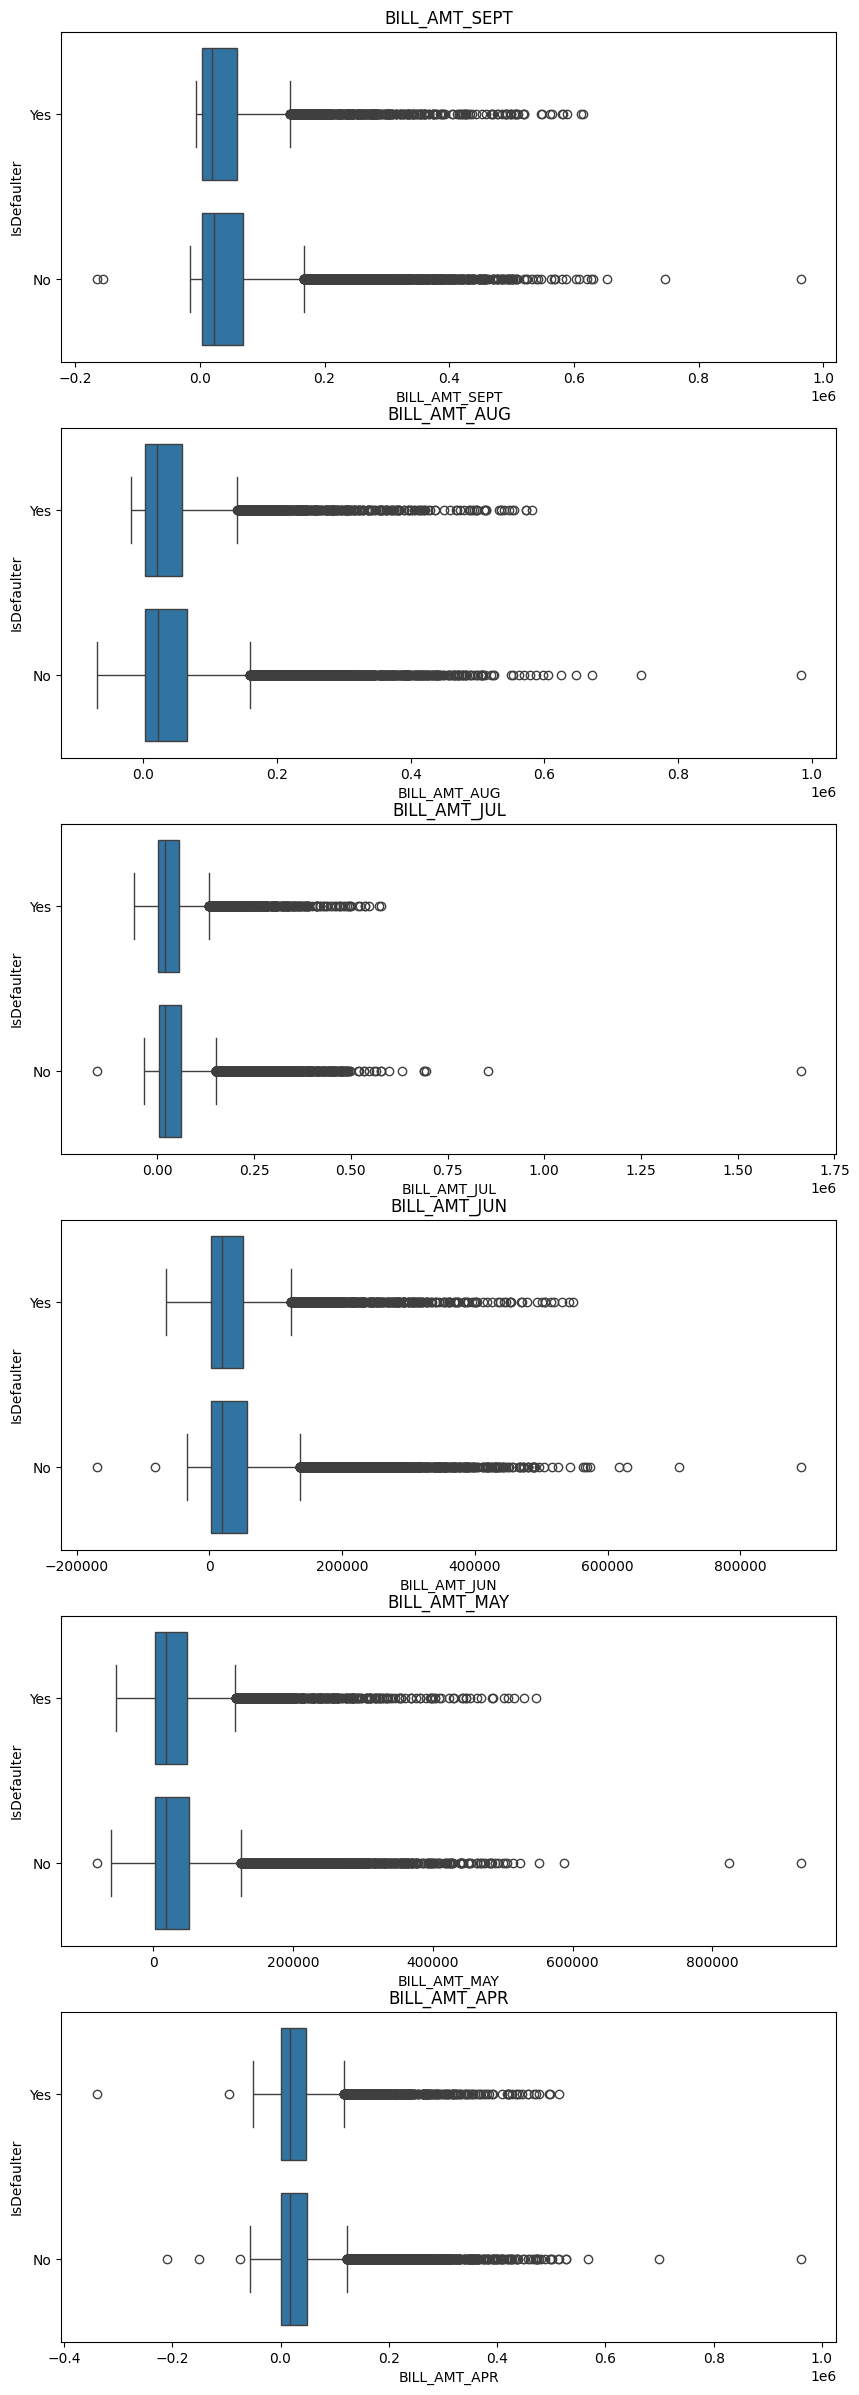

In [38]:
# Visualization of BILL AMOUNT VS IsDefaulters

monthlybill_col = ['BILL_AMT_SEPT','BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY','BILL_AMT_APR']
# plot the univariate distribution
fig,ax=plt.subplots(len(monthlybill_col),1,figsize=(10,30))
for i,col in enumerate(monthlybill_col):
  #plot the bivariate with isdefaulter
  sns.boxplot(x = col,y='IsDefaulter',data = df_credit,ax=ax[i])
  ax[i].set_title(col)


**Choice of Chart**:

* Box Plot: Provides a quick visual assessment of a dataset's variability, showing the median, quartiles, lowest and highest values, and any outliers. Outliers can indicate errors or rare events.

**Insights from the Chart**:

* The data distribution of monthly bills shows no significant difference between defaulters and non-defaulters.

**Business Impact**:

* No significant business insight is derived from the figures.

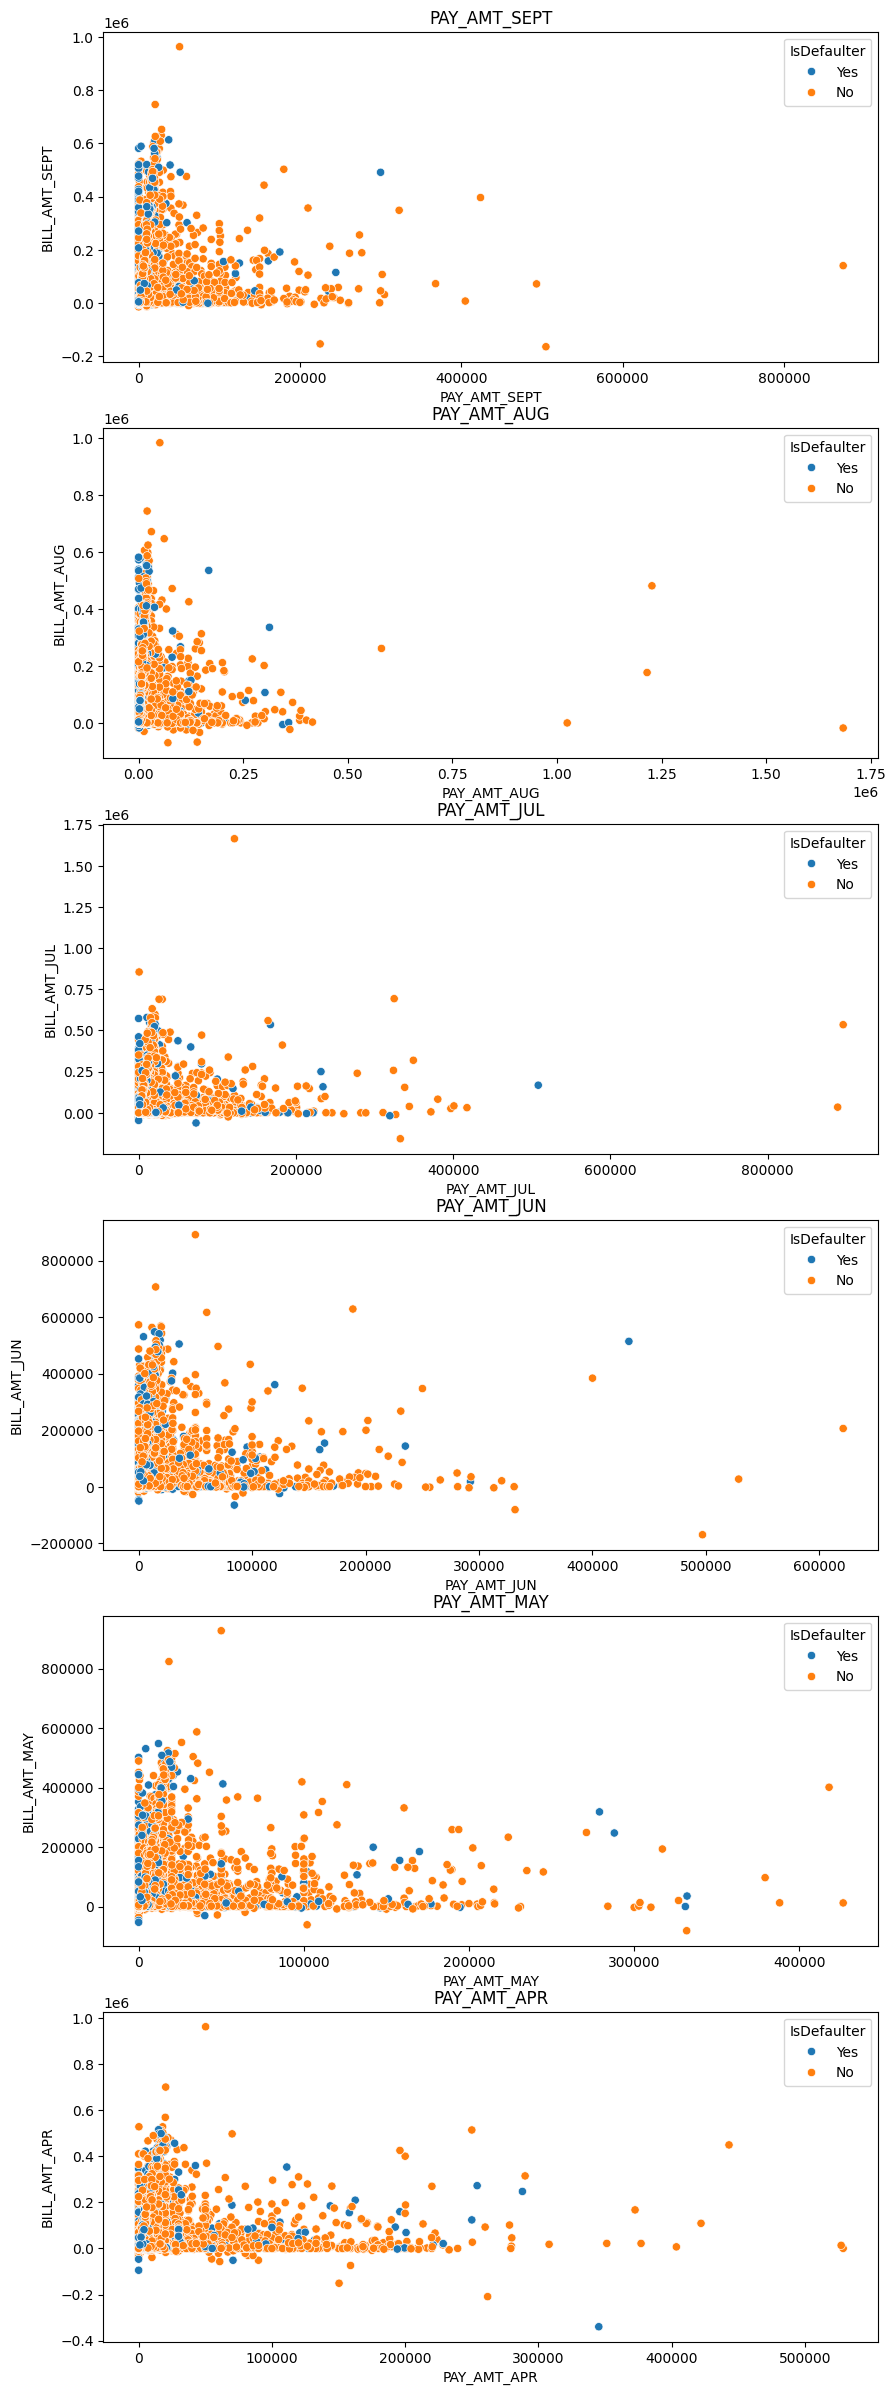

In [39]:
# Visualization of Pay amount vs Bill amount

previous_col = ['PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL','PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']
# plot the univariate distribution
fig,ax=plt.subplots(len(previous_col),1,figsize=(10,30))
for i,col in enumerate(previous_col):
  #plot the bivariate with isdefaulter
  sns.scatterplot(x = col,y=monthlybill_col[i],hue='IsDefaulter',data = df_credit,ax=ax[i])
  ax[i].set_title(col)


**Choice of Chart**:

* Scatterplot: Used to plot how a numerical feature is affected by another numerical value.

**Insights from the Chart**:

* When the previous payment is low but the monthly bill is high, there is a high possibility of defaulting on the payment.

**Business Impact**:

* Negative Impact: If a customer is spending exceptionally high relative to their payment history, the company should be concerned as this may indicate a higher risk of default

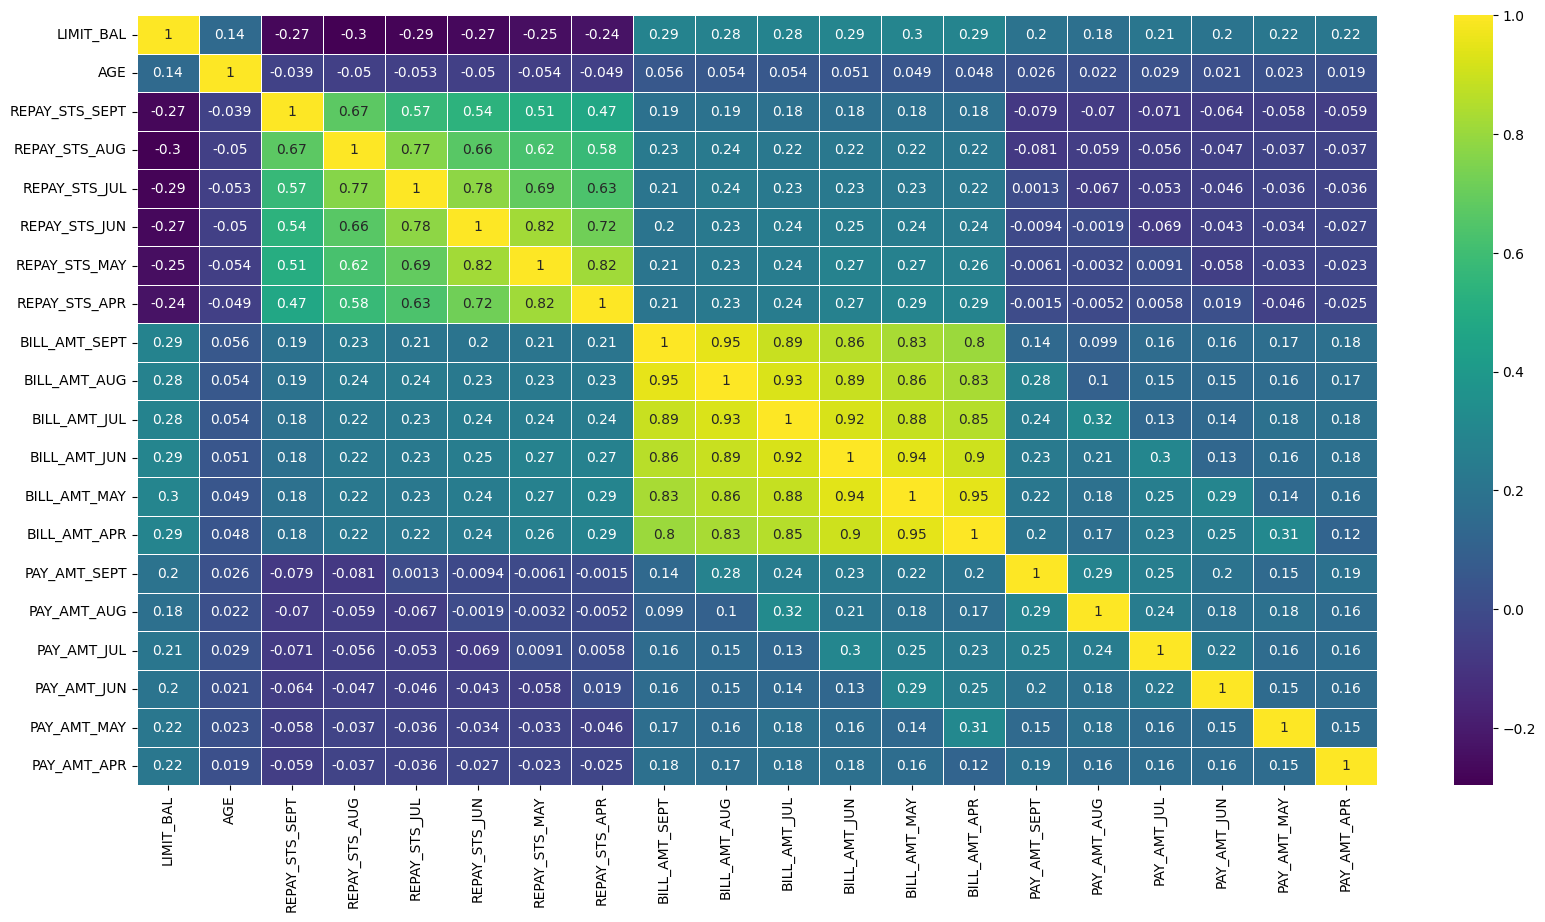

In [44]:
# Correlation Heatmap visualization code

# Exclude non-numeric columns before calculating the correlation
df_credit_numeric = df_credit.select_dtypes(include=['number'])

# Plot the correlation heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df_credit_numeric.corr(), linewidths=0.5, annot=True, cmap='viridis')
plt.show()



**Choice of Chart**:

* A correlation heatmap was chosen because it visually represents the strength of relationships between numerical variables.
* It helps identify which variables are closely related and the direction (positive or negative) of their relationship.

**Insights from the Chart**:

* The heatmap reveals high correlations between certain features like PAY_MAY & PAY_APR and BILL_AMT_MAY & BILL_AMT_APR, indicating these variables are closely related.
* These features contain crucial client transaction details and will not be eliminated, despite the high correlation, as they provide valuable information for further analysis.

**Business Impact**:

* The high correlations between these features suggest that they are important for understanding customer payment behavior, and retaining them can help in better predicting customer trends and behavior. This supports informed business decisions.






4o

**Hypothetical Statement - 1**

Married male defaults average age is 35 Years.

1. State the research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: N = 35


* Alternate Hypothesis : N != 35


* Test Type: Two Tailed Test

In [45]:
# Perform Statistical Test to obtain P-Value
sample_1=df_credit[(df_credit['MARRIAGE']=='Married')& (df_credit['SEX']=='Male')& (df_credit['IsDefaulter']=='Yes')].sample(1000)
# Getting the required parameter values for hypothesis testing
N= 35
sample_mean = sample_1['AGE'].mean()
size = len(sample_1)
# the standard deviation for population
std_pop = df_credit['AGE'].std()
Z_stat = ((sample_mean - N)/(std_pop/np.sqrt(N)))

#calculate the z value
z_value=norm.cdf(Z_stat,0,1)
#calculate p value
if z_value>0.5:
  P_value=2*(1-z_value)
else:
  P_value=2*z_value
print(f'P Value is {P_value} ')
if P_value>=0.05:
  print('Fail to reject the null hypothesis')
else:
  print('Reject the null hypothesis')


P Value is 5.209713516363124e-06 
Reject the null hypothesis


In [46]:
mean_median_difference=sample_1["AGE"].mean()- sample_1["AGE"].median()
print("Mean Median Difference is : ",mean_median_difference)

Mean Median Difference is :  1.0989999999999966


The Z-Test was chosen as the statistical test to calculate the P-Value, which led to the rejection of the null hypothesis. The result indicates that the average age of married male customers who default does not equal 35 years.

**Hypothetical Statement - 2**:

1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
* Null Hypothesis : mean = 90000

* Alternate Hypothesise : mean !=90000

* Type of Test : Two Tailed test

In [47]:
# Perform Statistical Test to obtain P-Value
sample_2=df_credit[(df_credit['IsDefaulter']=='Yes')].sample(1000)
# Getting the required parameter values for hypothesis testing
N= 90000
sample_mean = sample_2['LIMIT_BAL'].mean()
size = len(sample_2)
# calculate the t_statistic and p_value
t_statistic,P_value=stats.ttest_1samp(sample_2['LIMIT_BAL'],N)
print('T-Statistics value', t_statistic)
print("P-Value", P_value)
if P_value>=0.05:
  print('Fail to reject the null hypothesis')
else:
  print('Reject the null hypothesis')

T-Statistics value 10.516872421512334
P-Value 1.3192652629846486e-24
Reject the null hypothesis


The T-Test was utilized to generate the P-Value, leading to the rejection of the null hypothesis. This indicates that the customers who defaulted do not have an average credit limit of 90,000.

In [48]:
mean_median_difference=sample_2['LIMIT_BAL'].mean()- sample_2['LIMIT_BAL'].median()
print("Mean Median Difference is : ",mean_median_difference)

Mean Median Difference is :  47370.0


**Hypothetical Statement - 3**
1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
* Null Hypothesis(HO):Defaulter does not depends on Educational qualification.

* Alternate Hypothesis(Ha):Defaulter also get affected by Educational qualification.

In [49]:
# Perform Statistical Test to obtain P-Value
#Creating Contigency table of EDUCATION AND DEFAULT PAYMENT NEXT MONTH
cont_table=pd.crosstab(df_credit['IsDefaulter'], df_credit['EDUCATION'], margins=False)
#Using Chi-square test to validate Null/Alternate Hypothesis

stat, P_value, dof, expected = chi2_contingency(cont_table)
print("P-Value", P_value)
if P_value>=0.05:
  print('Fail to reject the null hypothesis')
else:
  print('Reject the null hypothesis')


P-Value 1.495064564810615e-34
Reject the null hypothesis


The statistical test used to obtain the P-Value was the Chi-Square test. The result showed that the null hypothesis was rejected, indicating that the likelihood of default does not depend on educational qualification.

The Chi-Square test was chosen because it is appropriate for testing the relationship between categorical variables, such as the educational qualification and the status of being a defaulter or non-defaulter. It helps in comparing the observed frequencies with the expected frequencies to determine if there is a significant difference between them.

**FEATURE ENGINEERING & DATA PRE-PROCESSING**

**1. Handling Missing Values**

In [50]:
Nullvalues = df_credit.isnull().sum()
Nullvalues


,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
REPAY_STS_SEPT,0
REPAY_STS_AUG,0
REPAY_STS_JUL,0
REPAY_STS_JUN,0
REPAY_STS_MAY,0


No null values present in the data set.

In [51]:
duplicatevalues = df_credit.duplicated()
duplicatevalues

,0
0,False
1,False
2,False
3,False
4,False
...,...
29995,False
29996,False
29997,False
29998,False


No duplicate values presen int the data

**2.Handling Outliers**


In [52]:
df_credit.describe()

,LIMIT_BAL,AGE,REPAY_STS_SEPT,REPAY_STS_AUG,REPAY_STS_JUL,REPAY_STS_JUN,REPAY_STS_MAY,REPAY_STS_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


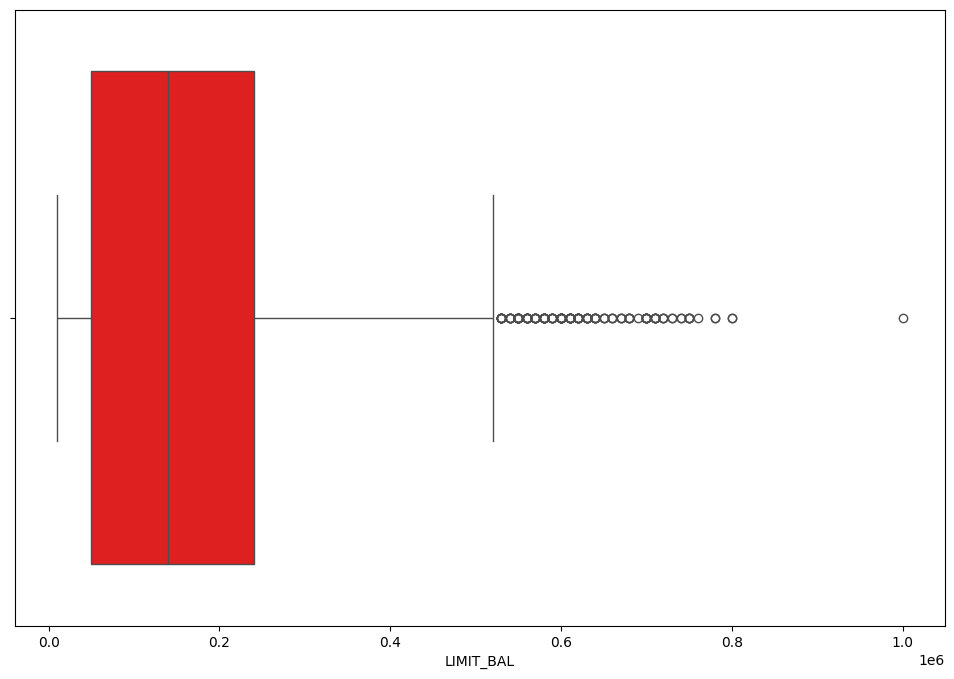

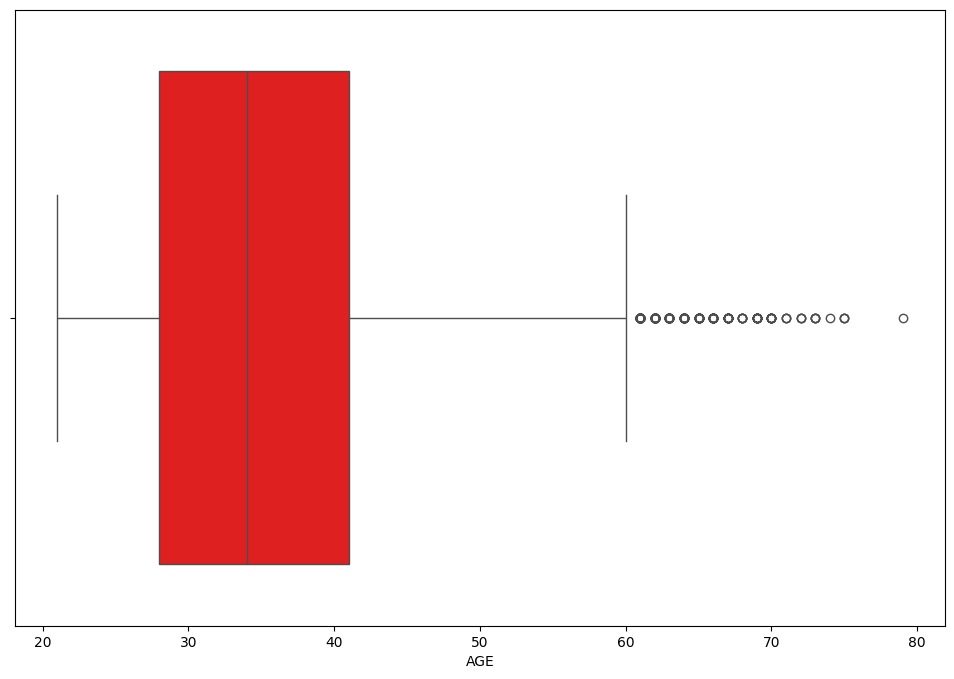

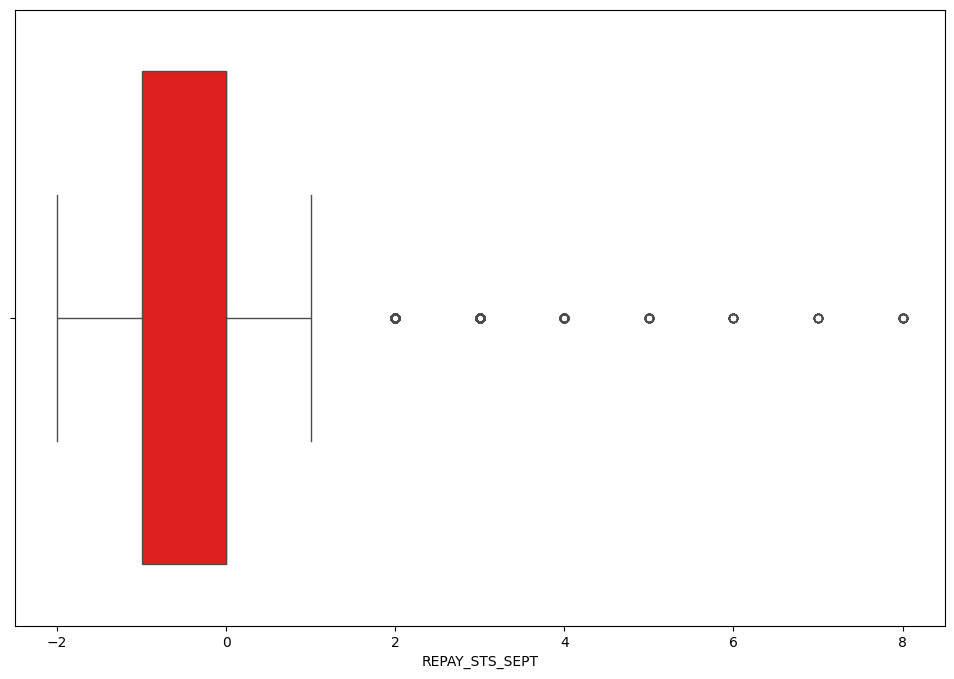

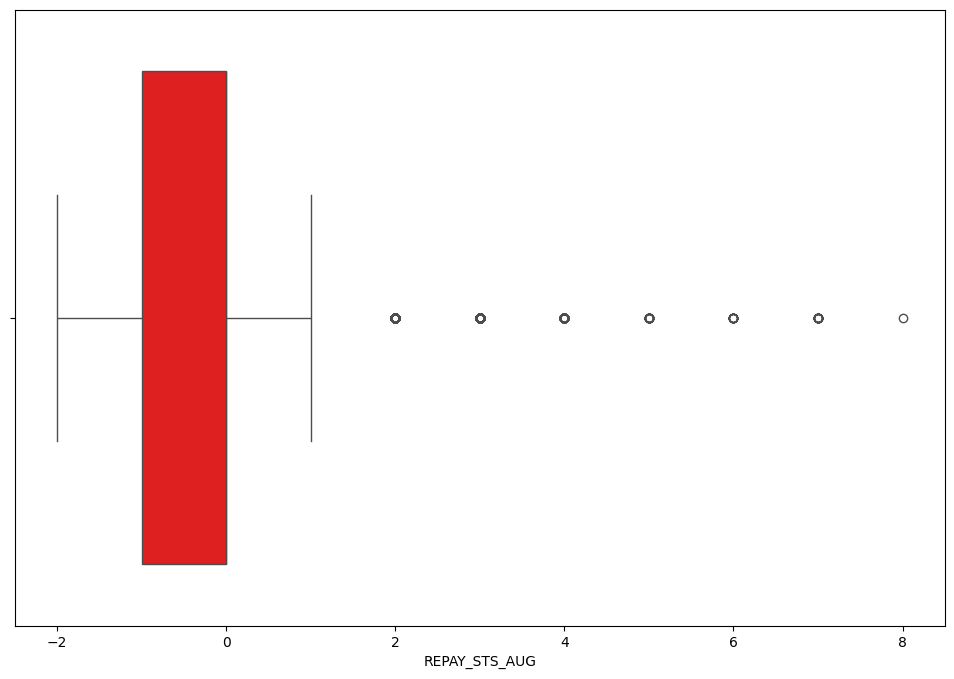

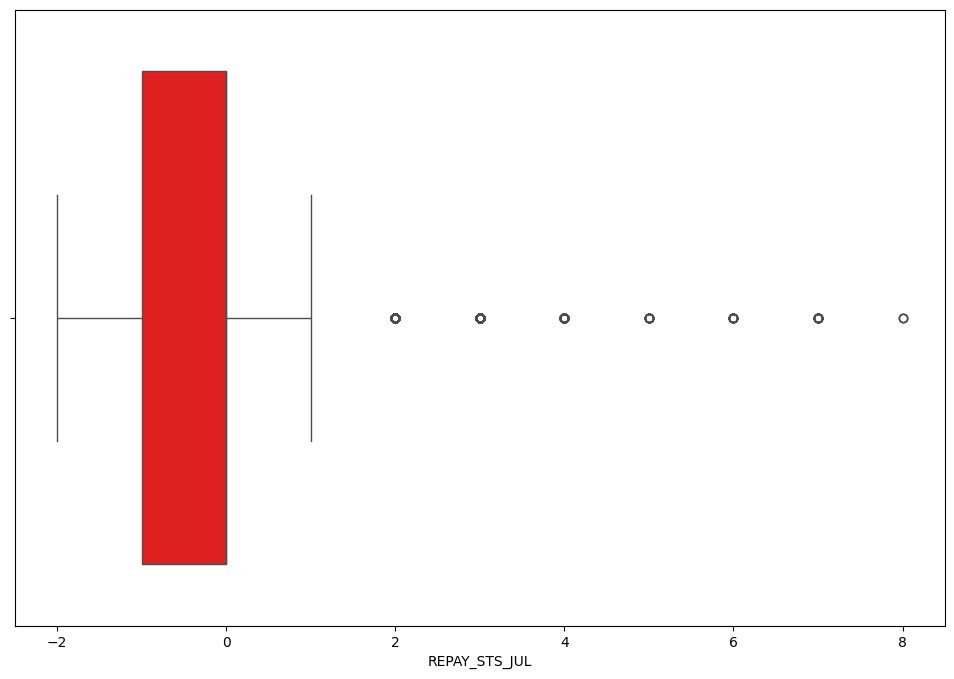

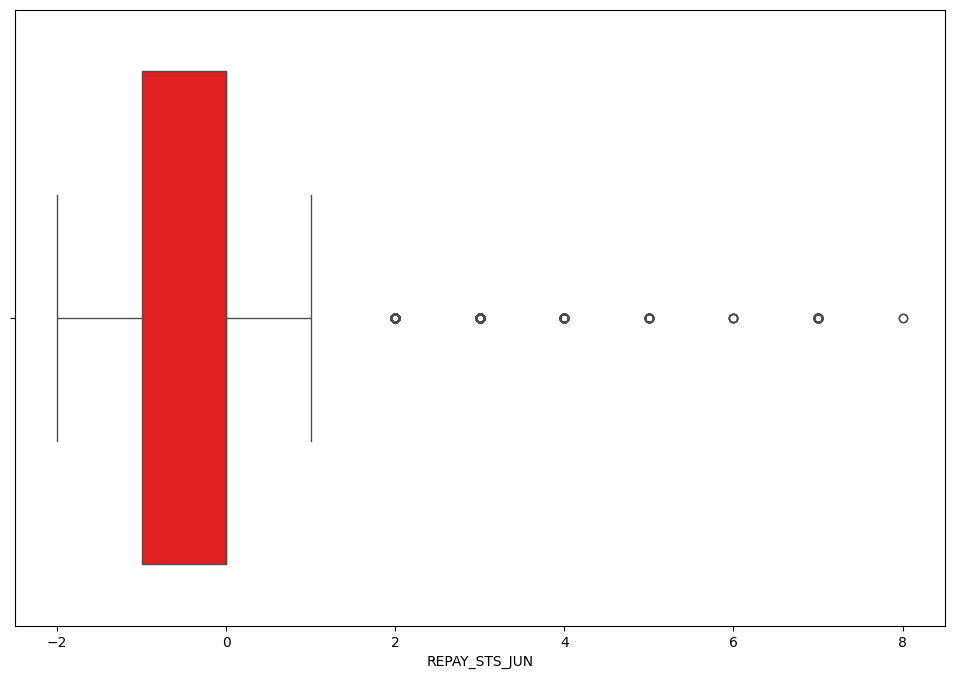

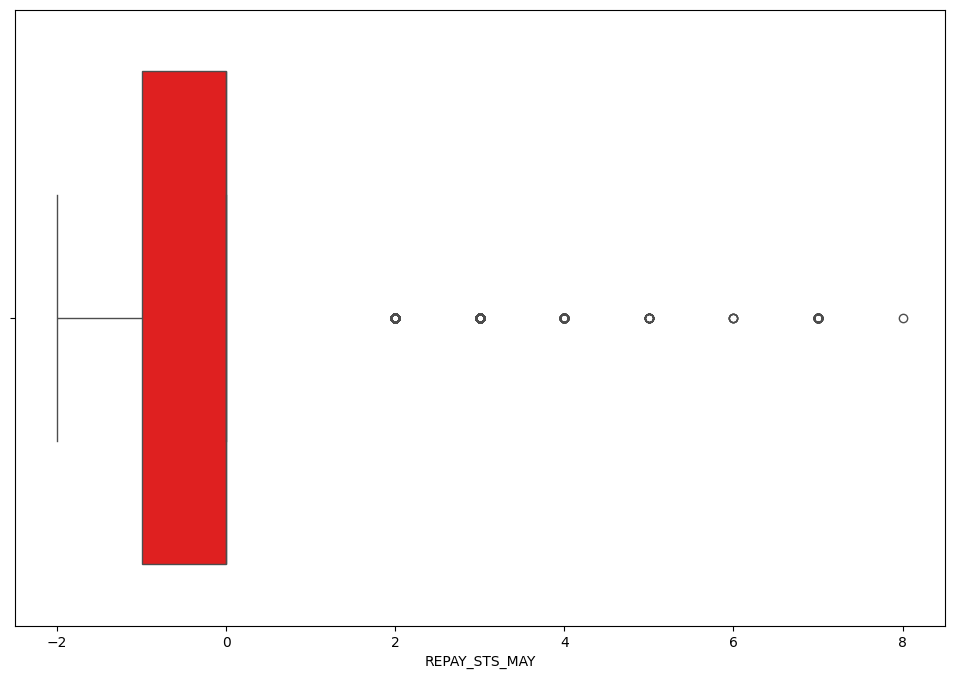

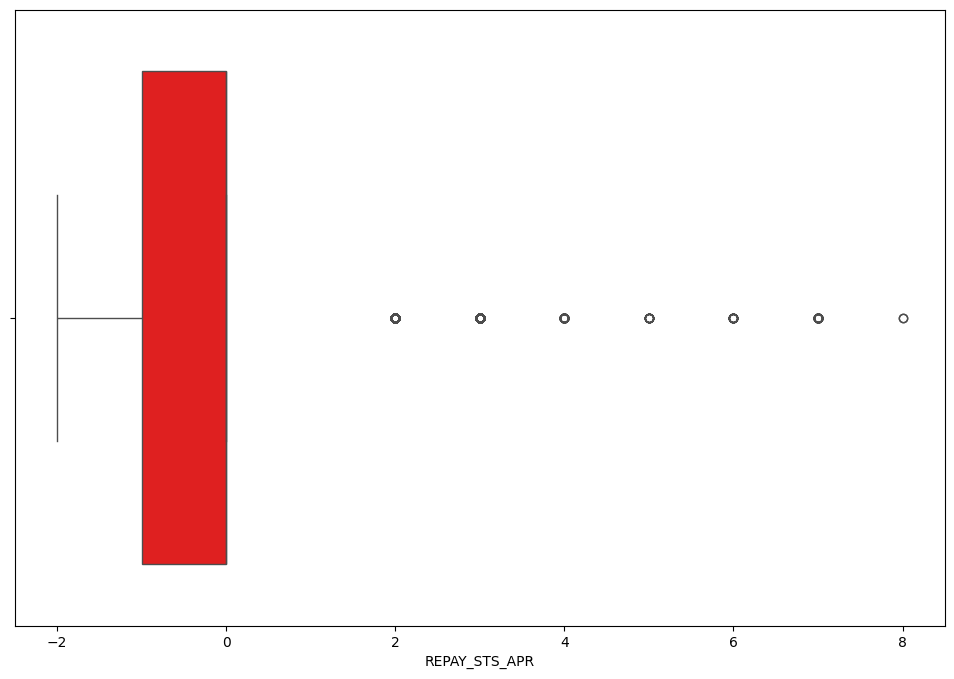

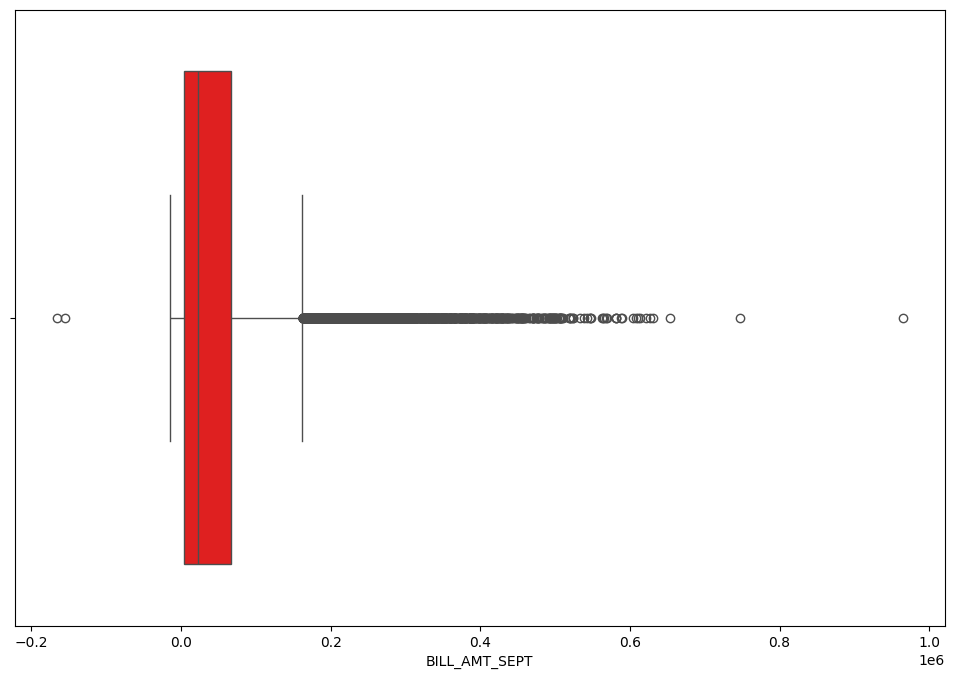

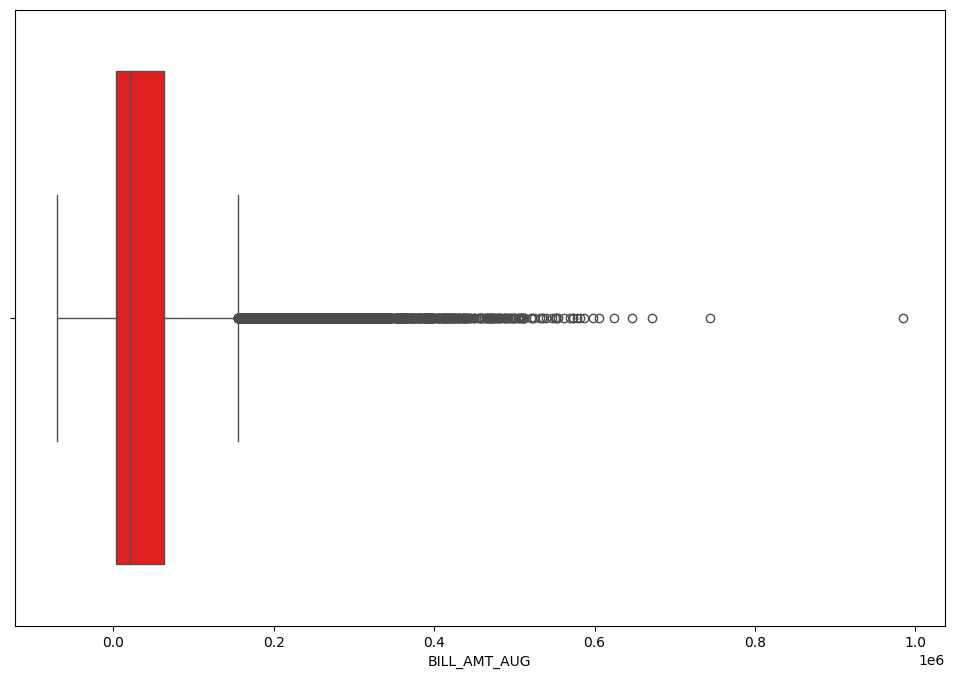

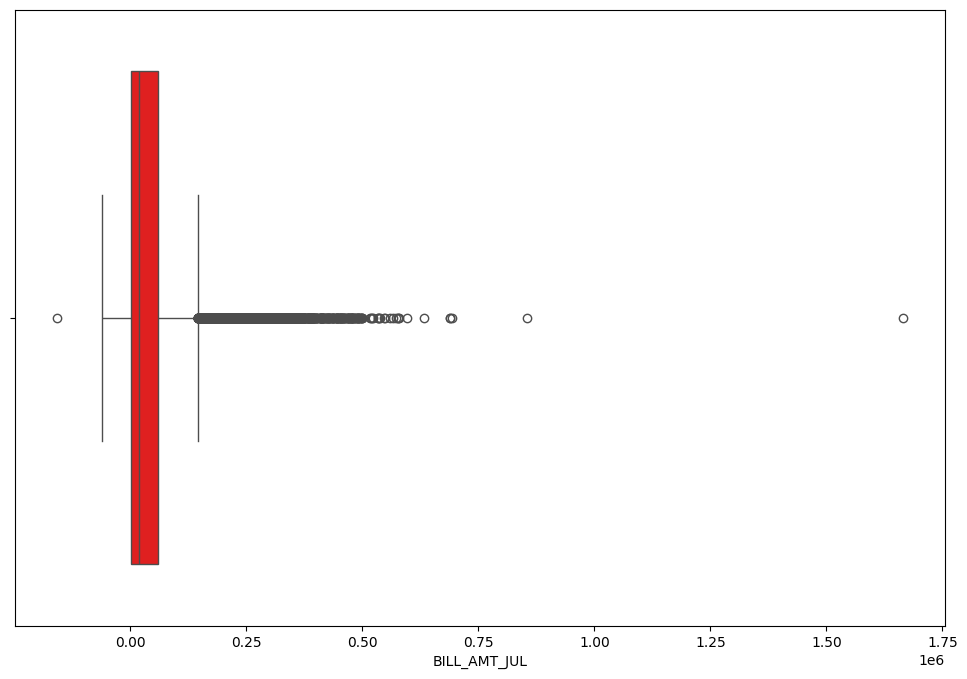

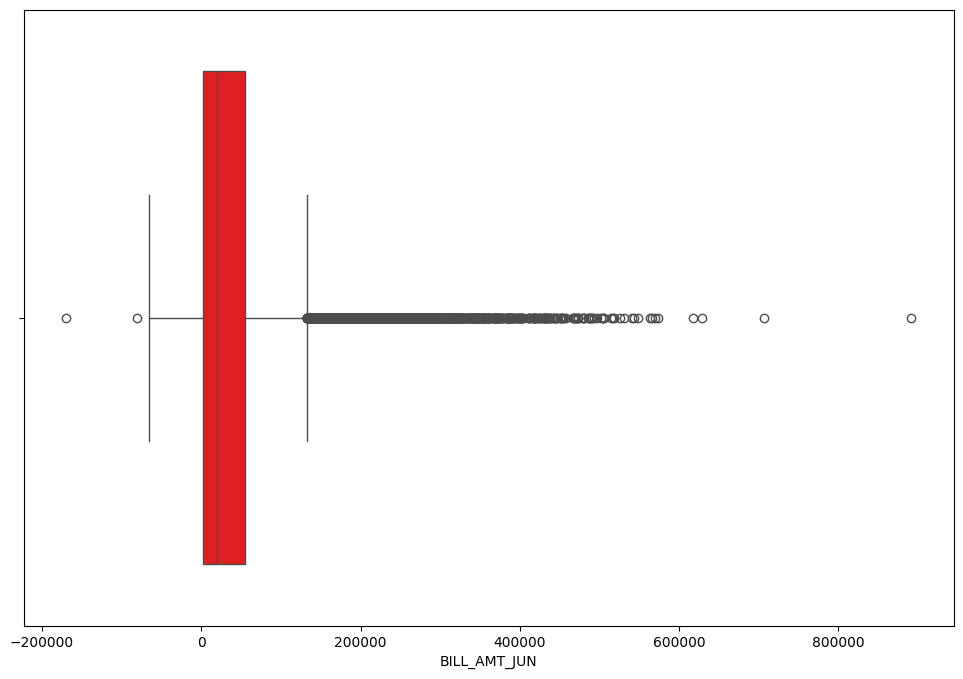

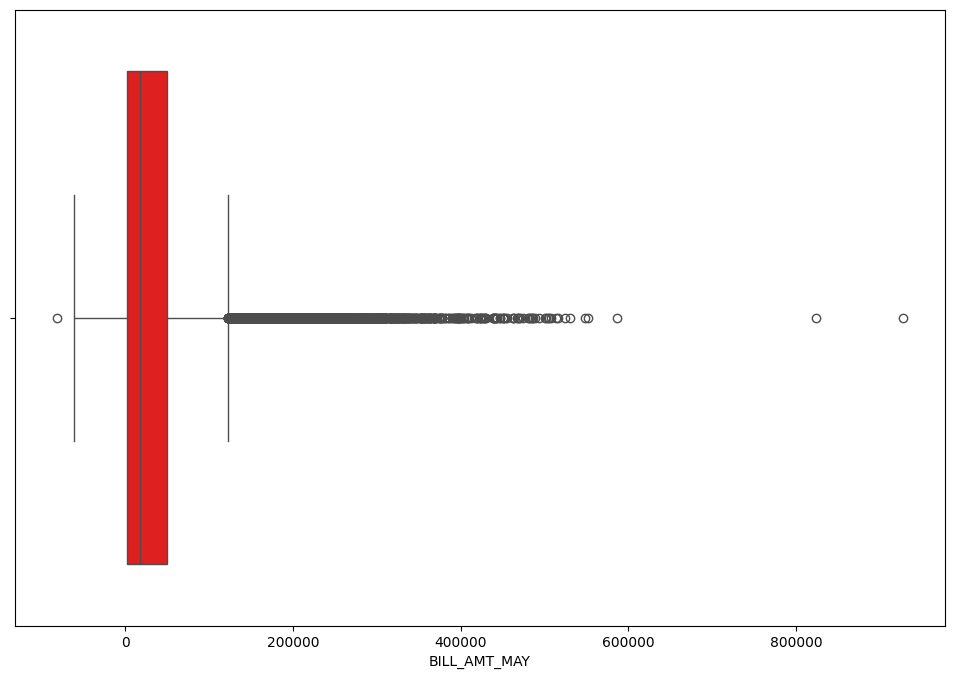

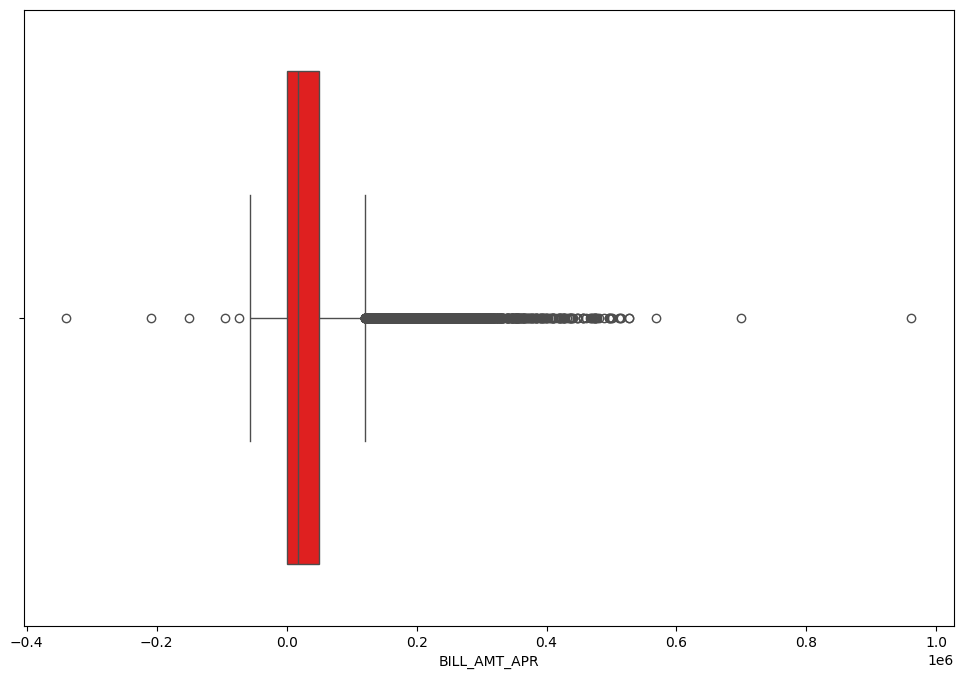

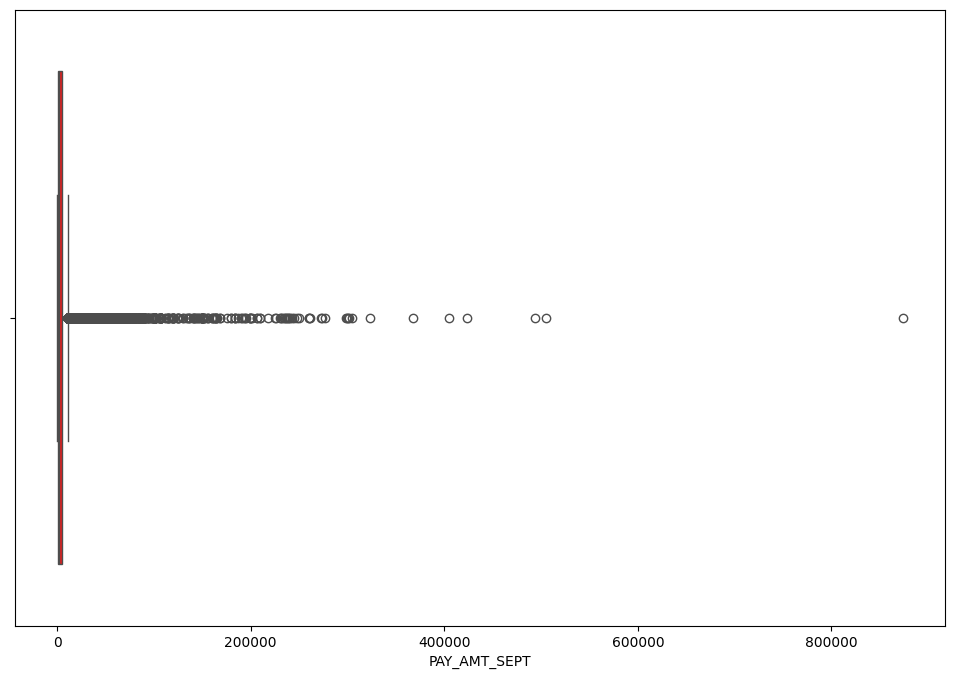

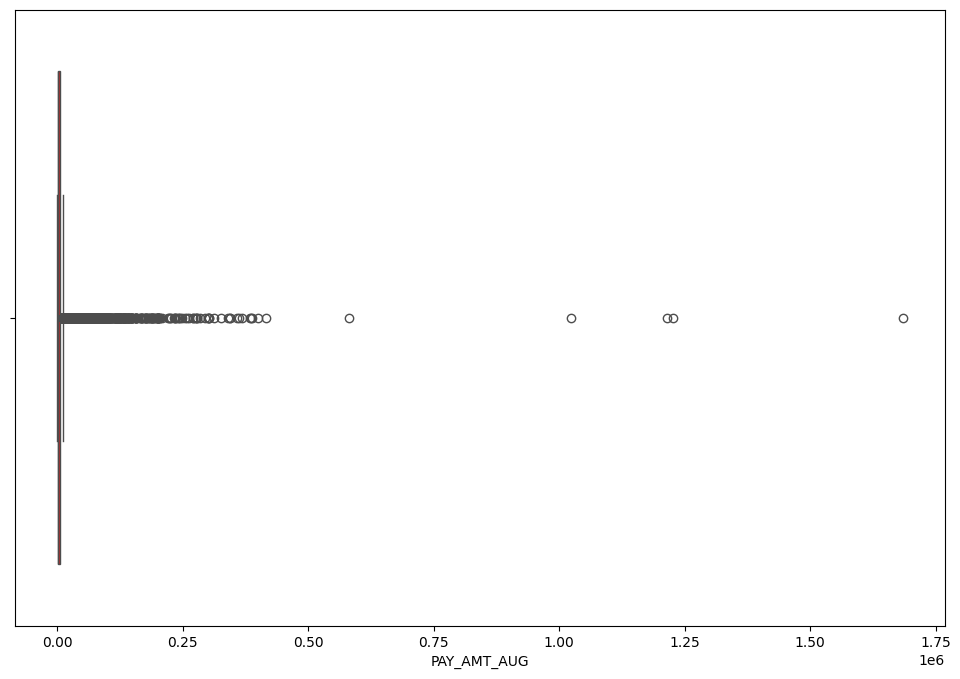

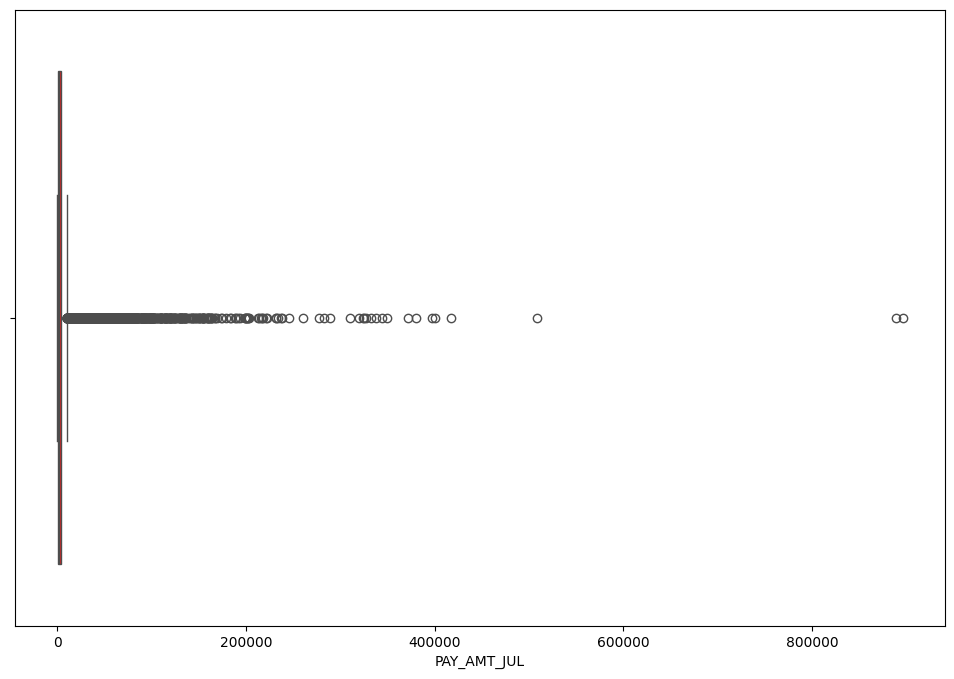

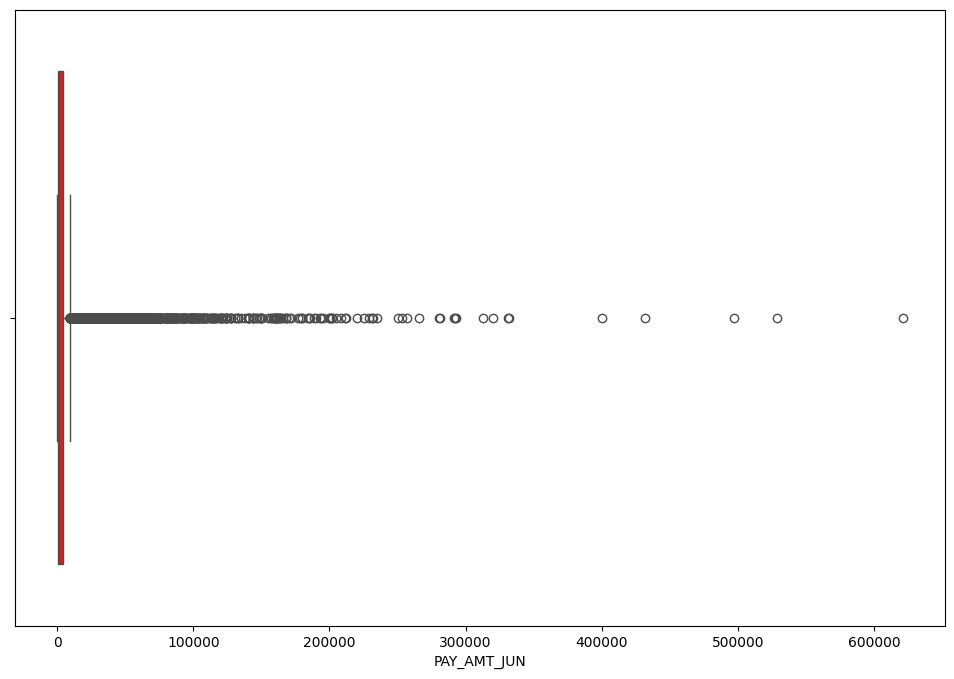

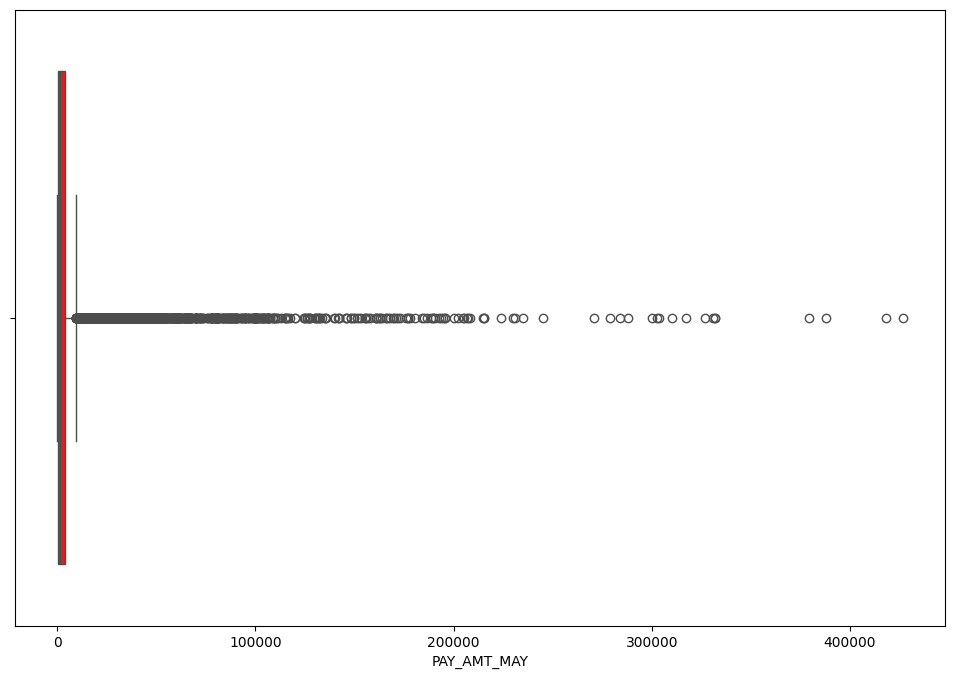

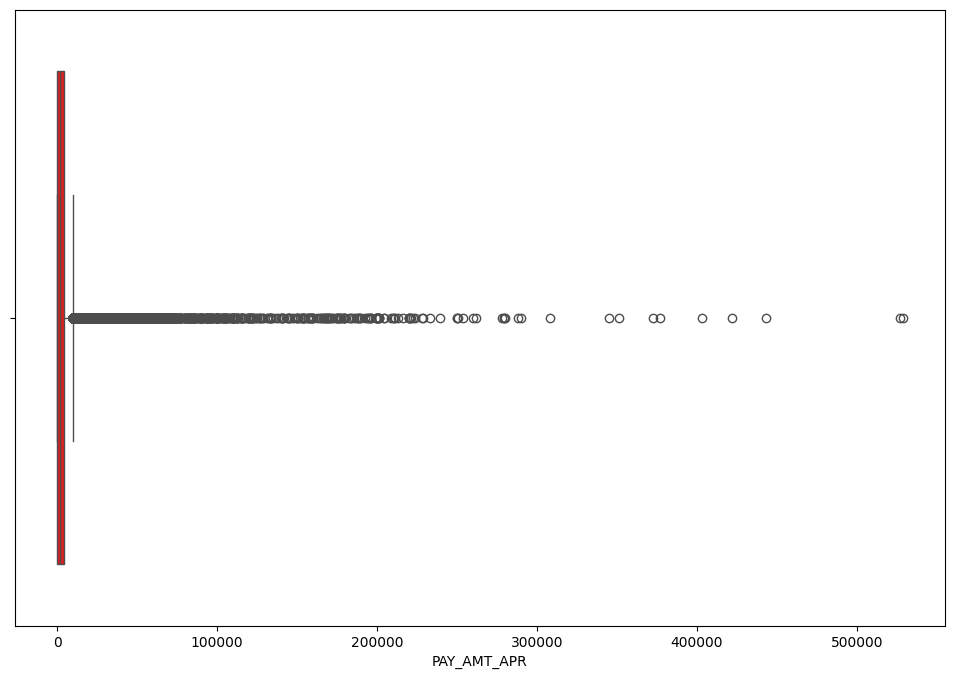

In [53]:
for col in df_credit.describe().columns:
  plt.figure(figsize=(12,8))
  sns.boxplot(x=df_credit[col],color='r')


The technique used to identify outliers was the boxplot, which visually highlights potential outliers in the dataset. These outliers were primarily found in numeric features related to quantity. To treat these outliers, the Interquartile Range (IQR) method was considered, as it is a standard approach to detect and handle outliers without knowing the exact limits for the columns from the bank.

However, no outlier treatment techniques were ultimately applied because treating these outliers could lead to data loss. Additionally, there was a concern that the high values identified as outliers might actually represent valid, extreme values rather than errors, making it important not to eliminate them indiscriminately. As a result, the outlying values were kept intact, preserving the integrity of the dataset.

**3.Categorical Encoding**

In [54]:
df=df_credit.copy()
df.info()   #FRom imfo we can see that there 3 object type nad reamining are int type we need to change theat type in to int by cateroigal encdig

df.replace({'IsDefaulter':{'Yes':1,'No':0}},inplace=True)

#Creating dummies
df=pd.get_dummies(df)

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   LIMIT_BAL       30000 non-null  int64 
 1   SEX             30000 non-null  object
 2   EDUCATION       30000 non-null  object
 3   MARRIAGE        30000 non-null  object
 4   AGE             30000 non-null  int64 
 5   REPAY_STS_SEPT  30000 non-null  int64 
 6   REPAY_STS_AUG   30000 non-null  int64 
 7   REPAY_STS_JUL   30000 non-null  int64 
 8   REPAY_STS_JUN   30000 non-null  int64 
 9   REPAY_STS_MAY   30000 non-null  int64 
 10  REPAY_STS_APR   30000 non-null  int64 
 11  BILL_AMT_SEPT   30000 non-null  int64 
 12  BILL_AMT_AUG    30000 non-null  int64 
 13  BILL_AMT_JUL    30000 non-null  int64 
 14  BILL_AMT_JUN    30000 non-null  int64 
 15  BILL_AMT_MAY    30000 non-null  int64 
 16  BILL_AMT_APR    30000 non-null  int64 
 17  PAY_AMT_SEPT    30000 non-null  int64 
 18  PAY_AM

,LIMIT_BAL,AGE,REPAY_STS_SEPT,REPAY_STS_AUG,REPAY_STS_JUL,REPAY_STS_JUN,REPAY_STS_MAY,REPAY_STS_APR,BILL_AMT_SEPT,BILL_AMT_AUG,...,IsDefaulter,SEX_Female,SEX_Male,EDUCATION_Graduate School,EDUCATION_High School,EDUCATION_University,EDUCATION_others,MARRIAGE_Married,MARRIAGE_Single,MARRIAGE_others
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,1,True,False,False,False,True,False,True,False,False
1,120000,26,-1,2,0,0,0,2,2682,1725,...,1,True,False,False,False,True,False,False,True,False
2,90000,34,0,0,0,0,0,0,29239,14027,...,0,True,False,False,False,True,False,False,True,False
3,50000,37,0,0,0,0,0,0,46990,48233,...,0,True,False,False,False,True,False,True,False,False
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,0,False,True,False,False,True,False,True,False,False


In [55]:
df.columns

Index(['LIMIT_BAL', 'AGE', 'REPAY_STS_SEPT', 'REPAY_STS_AUG', 'REPAY_STS_JUL',
       'REPAY_STS_JUN', 'REPAY_STS_MAY', 'REPAY_STS_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'IsDefaulter',
       'SEX_Female', 'SEX_Male', 'EDUCATION_Graduate School',
       'EDUCATION_High School', 'EDUCATION_University', 'EDUCATION_others',
       'MARRIAGE_Married', 'MARRIAGE_Single', 'MARRIAGE_others'],
      dtype='object')

The categorical encoding technique used is One-Hot Encoding. This technique converts categorical data into a binary vector representation, where each unique value in a categorical column is transformed into a separate column. Each new column corresponds to a unique category, and the value is represented as 1 if the observation belongs to that category, and 0 otherwise.

The Pandas get_dummies() function was utilized to implement One-Hot Encoding. This technique is crucial for machine learning algorithms that only accept numerical input, such as decision trees and support vector machines. By applying One-Hot Encoding, the categorical variables were converted into a numerical format that is suitable for these algorithms, allowing the model to process the data effectively.

This method was chosen because it allows the algorithm to learn from categorical data while preserving the distinct nature of each category, without introducing any ordinal relationships between them, which could be misleading.

**4.Feature Selection**

In [56]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# Load your dataset (replace 'credit.csv' with the actual path to your dataset)
data = df

# Assuming your target variable is 'IsDefaulter' and other columns are features
X = data.drop('IsDefaulter', axis=1)
y = data['IsDefaulter']

# Ensure all features are non-negative by applying Min-Max scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Initialize the SelectKBest object with chi2 as the scoring function
# You can specify the number of top features you want to select using the 'k' parameter
k_best = SelectKBest(score_func=chi2, k='all')

# Fit the SelectKBest object to your data
k_best.fit(X, y)

# Get the feature scores
feature_scores = k_best.scores_

# Create a DataFrame to display the feature names and their corresponding Chi-squared scores
feature_chi2_scores = pd.DataFrame({'Feature': data.columns[:-1], 'Chi-squared_Score': feature_scores})

# Sort the features by Chi-squared score in descending order
feature_chi2_scores = feature_chi2_scores.sort_values(by='Chi-squared_Score', ascending=False)

# Display the top features with their Chi-squared scores
print(feature_chi2_scores)

                      Feature  Chi-squared_Score
2              REPAY_STS_SEPT         201.517549
3               REPAY_STS_AUG         160.027300
4               REPAY_STS_JUL         129.692706
5               REPAY_STS_JUN         108.131709
6               REPAY_STS_MAY          92.598810
7               REPAY_STS_APR          81.065996
0                   LIMIT_BAL          76.341829
25       EDUCATION_University          61.686112
22                   SEX_Male          51.149551
21                 SEX_Female          28.922107
23  EDUCATION_Graduate School          26.336315
24      EDUCATION_High School          21.237973
20                IsDefaulter          18.983326
26           EDUCATION_others          14.486745
27           MARRIAGE_Married          13.159406
18                PAY_AMT_MAY          10.394332
19                PAY_AMT_APR           9.725684
14               PAY_AMT_SEPT           8.847610
17                PAY_AMT_JUN           7.933442
16                PA

In [57]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Load your dataset (replace 'credit.csv' with the actual path to your dataset)
data = df

# Assuming your target variable is 'IsDefaulter' and other columns are features
X = data.drop('IsDefaulter', axis=1)
y = data['IsDefaulter']

# Initialize the SelectKBest object with mutual_info_classif as the scoring function
# You can specify the number of top features you want to select using the 'k' parameter
k_best = SelectKBest(score_func=mutual_info_classif, k='all')

# Fit the SelectKBest object to your data
k_best.fit(X, y)

# Get the feature scores
feature_scores = k_best.scores_

# Create a DataFrame to display the feature names and their corresponding information gain scores
feature_info_gain = pd.DataFrame({'Feature': X.columns, 'Information_Gain': feature_scores})

# Sort the features by information gain in descending order
feature_info_gain = feature_info_gain.sort_values(by='Information_Gain', ascending=False)

# Display the top features with their information gain scores
print(feature_info_gain)


                      Feature  Information_Gain
2              REPAY_STS_SEPT          0.074260
3               REPAY_STS_AUG          0.046961
4               REPAY_STS_JUL          0.040368
6               REPAY_STS_MAY          0.033808
5               REPAY_STS_JUN          0.033555
7               REPAY_STS_APR          0.029657
14               PAY_AMT_SEPT          0.023310
15                PAY_AMT_AUG          0.018143
16                PAY_AMT_JUL          0.017091
17                PAY_AMT_JUN          0.015343
18                PAY_AMT_MAY          0.013836
19                PAY_AMT_APR          0.012605
0                   LIMIT_BAL          0.011235
8               BILL_AMT_SEPT          0.010144
13               BILL_AMT_APR          0.007842
10               BILL_AMT_JUL          0.006628
12               BILL_AMT_MAY          0.006598
9                BILL_AMT_AUG          0.005673
1                         AGE          0.005231
24       EDUCATION_University          0

**5.Data Transformation**

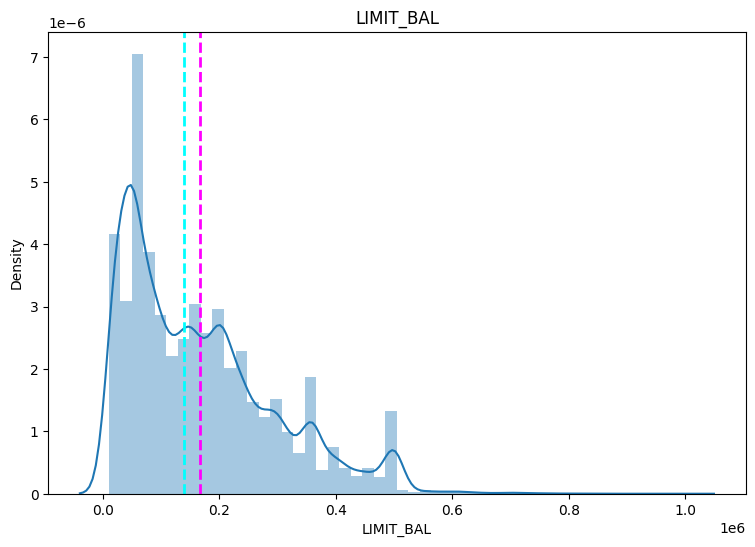

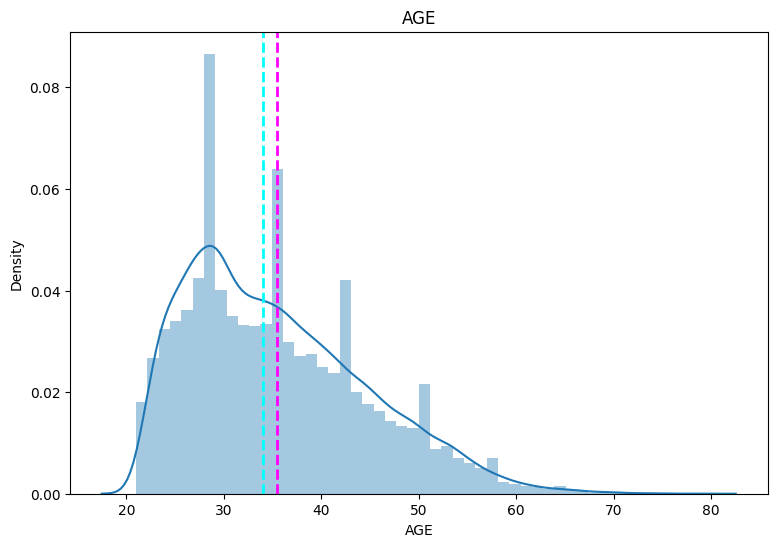

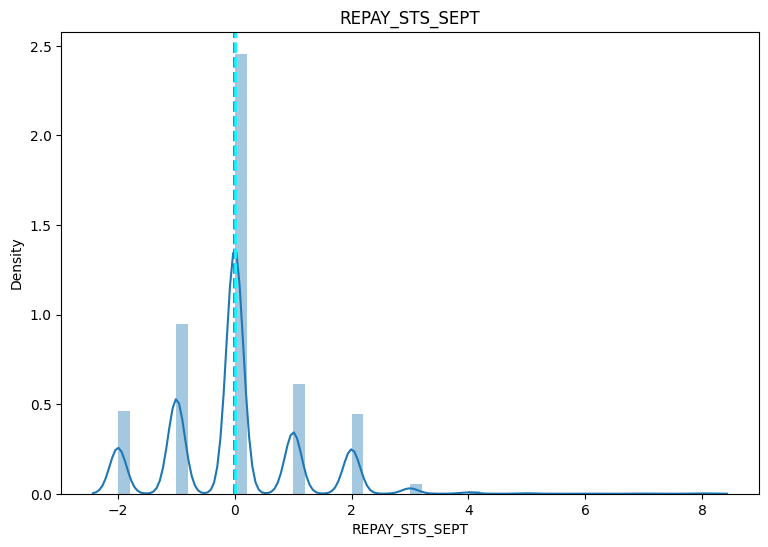

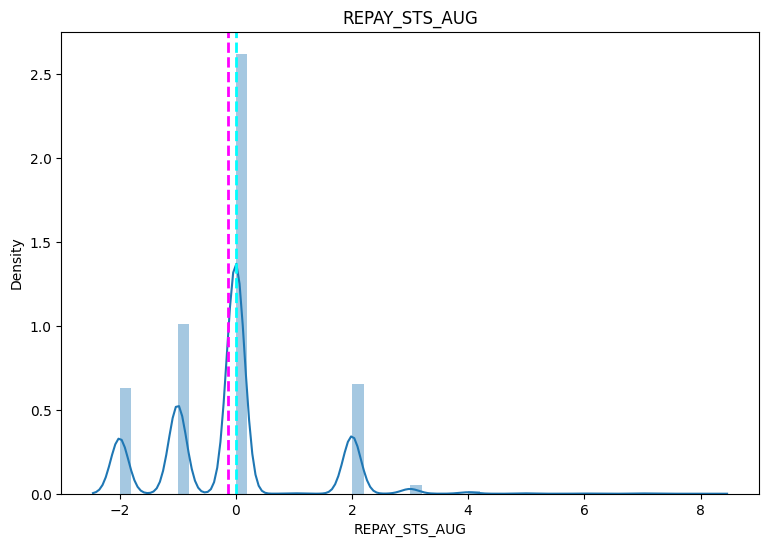

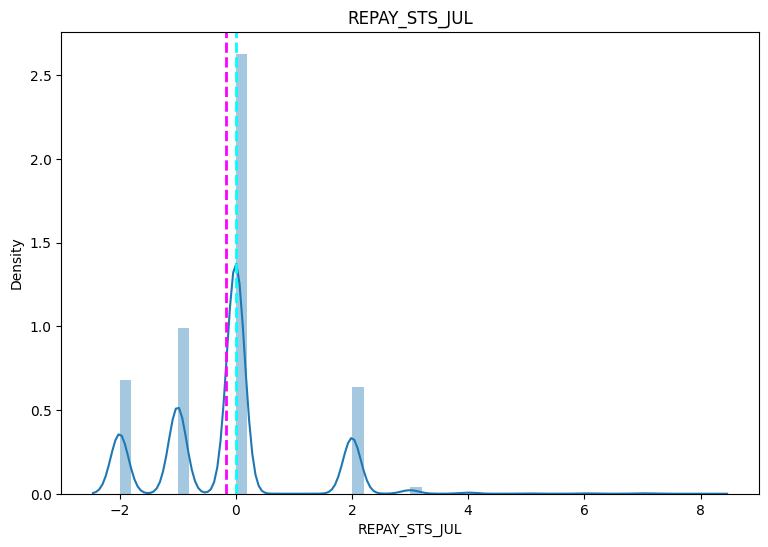

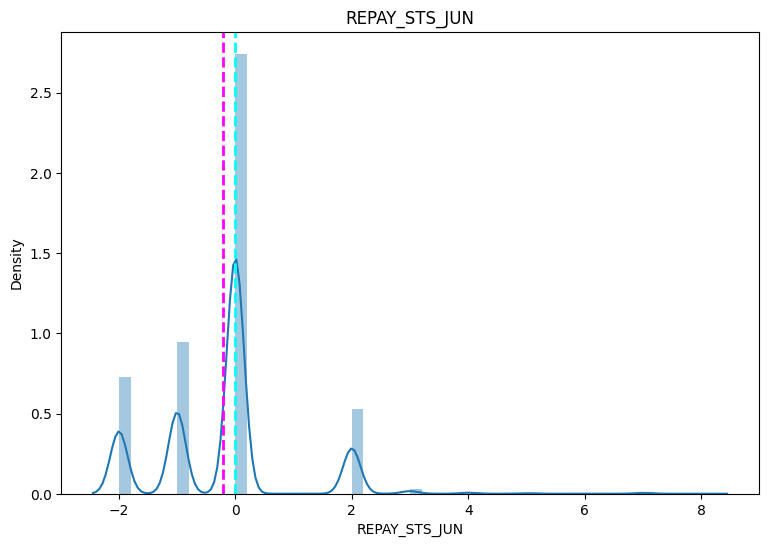

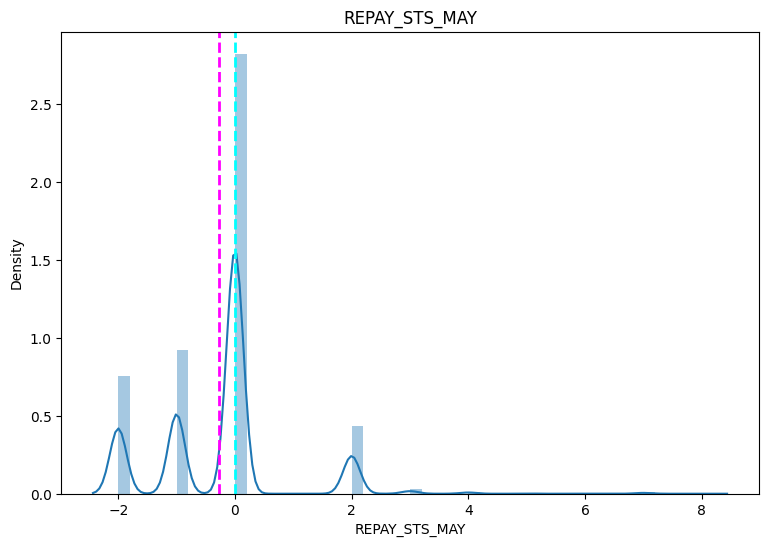

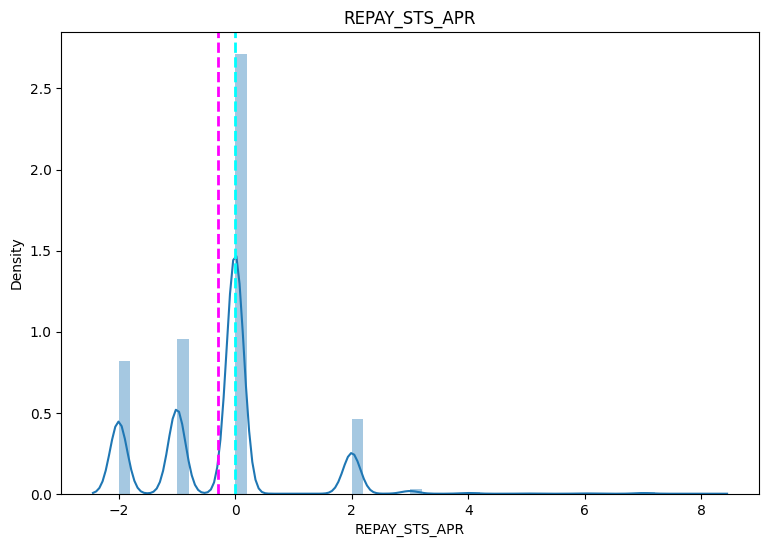

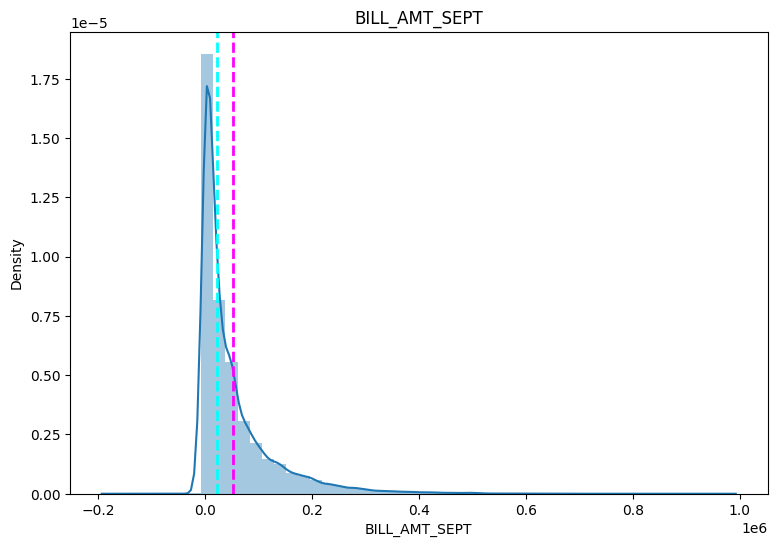

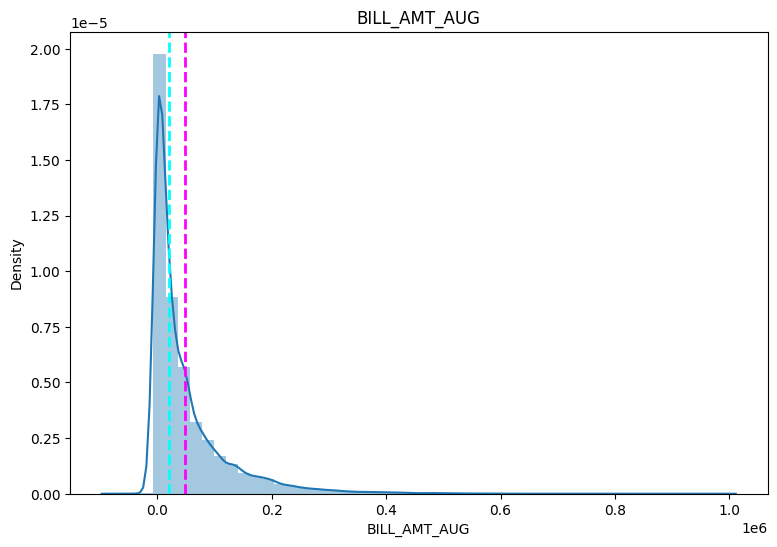

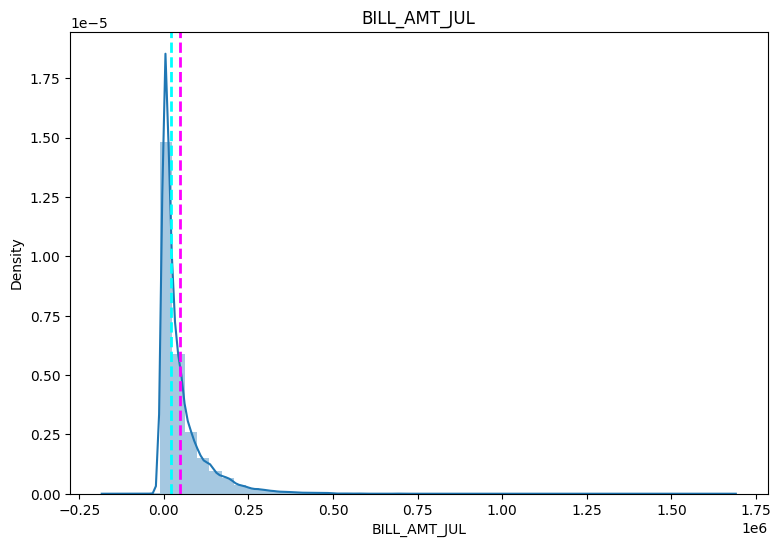

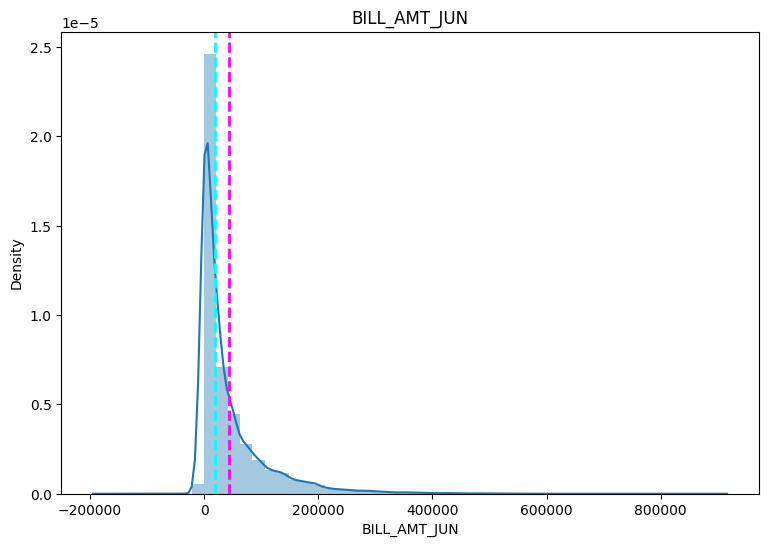

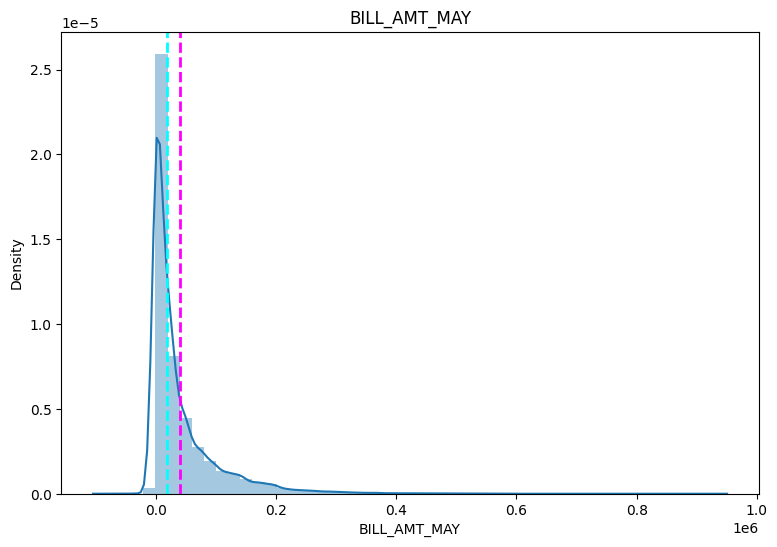

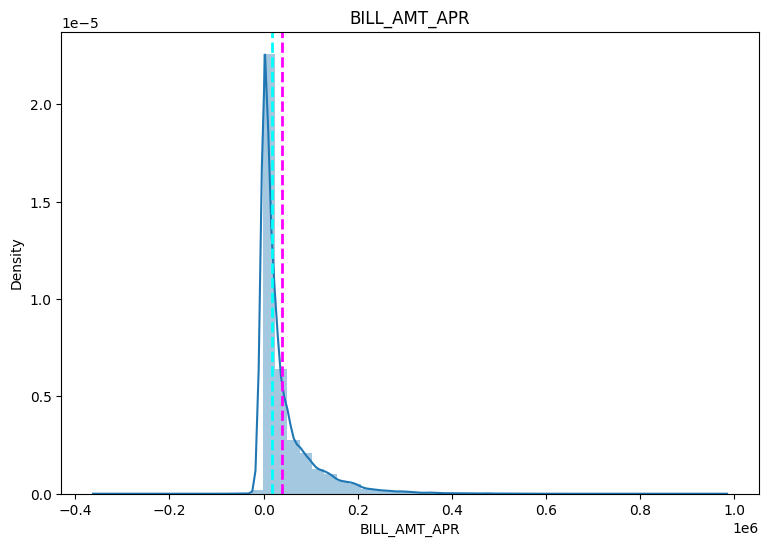

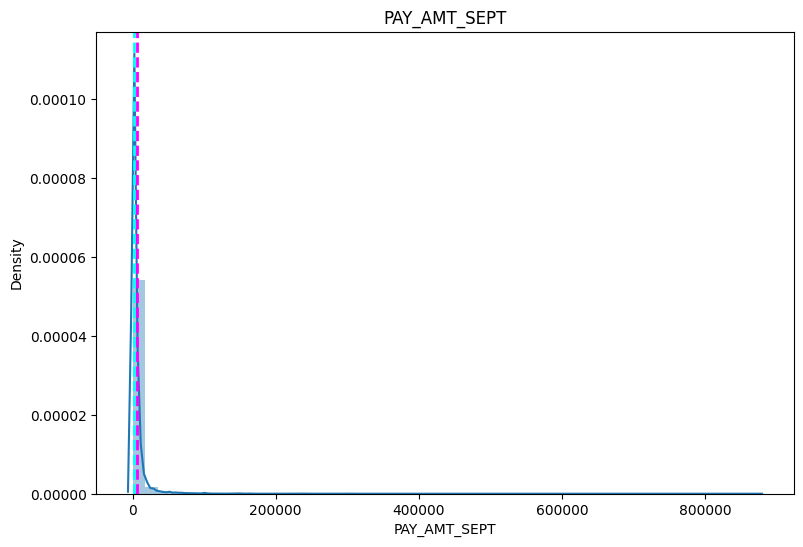

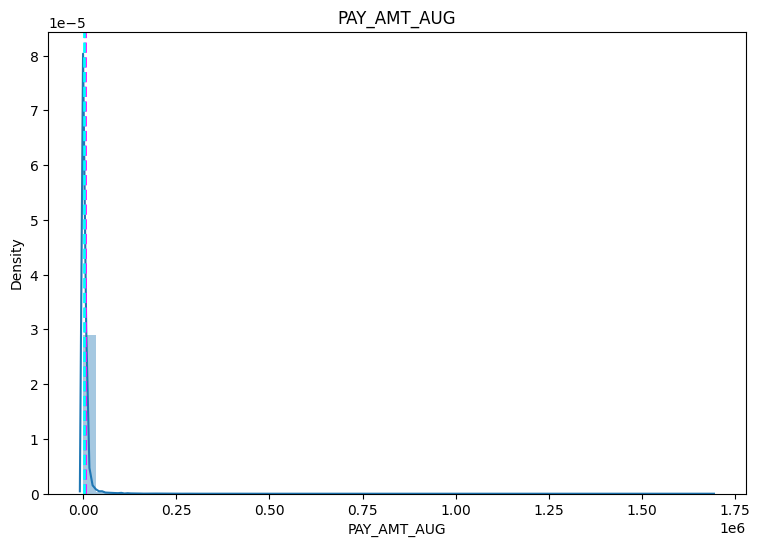

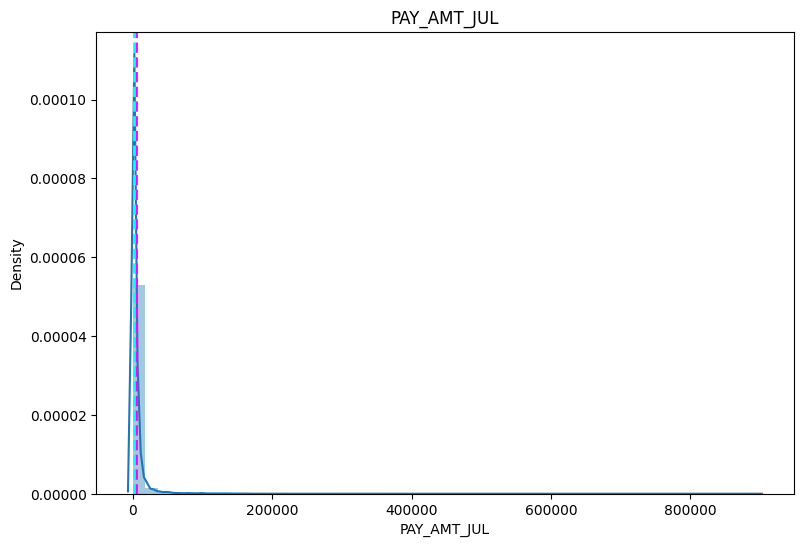

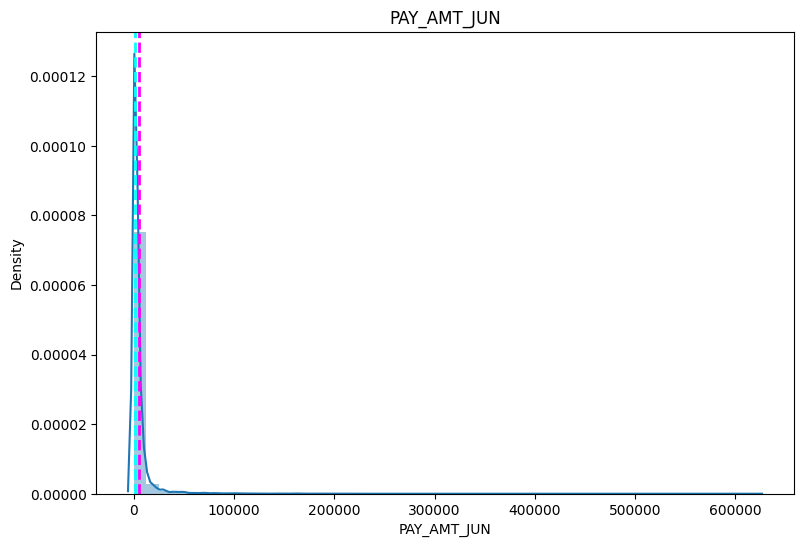

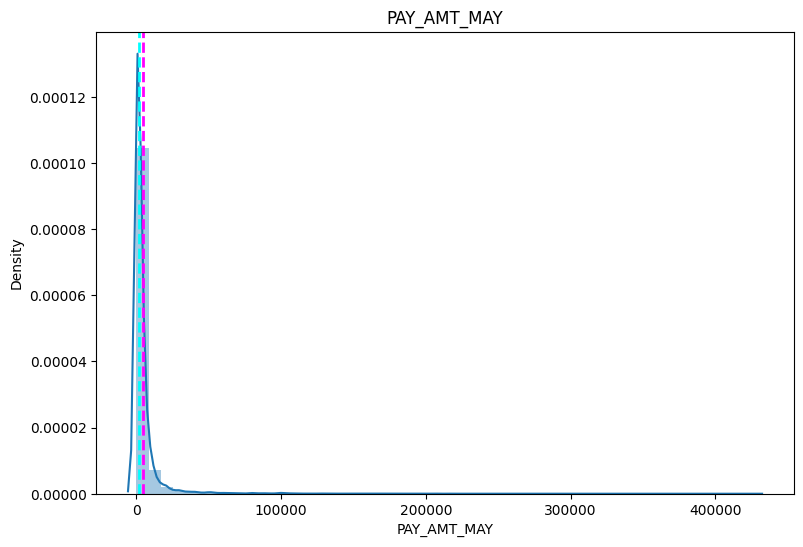

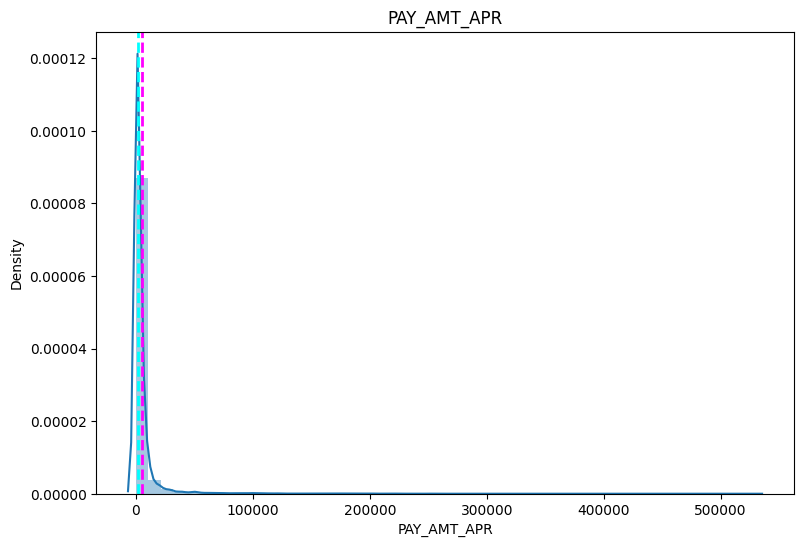

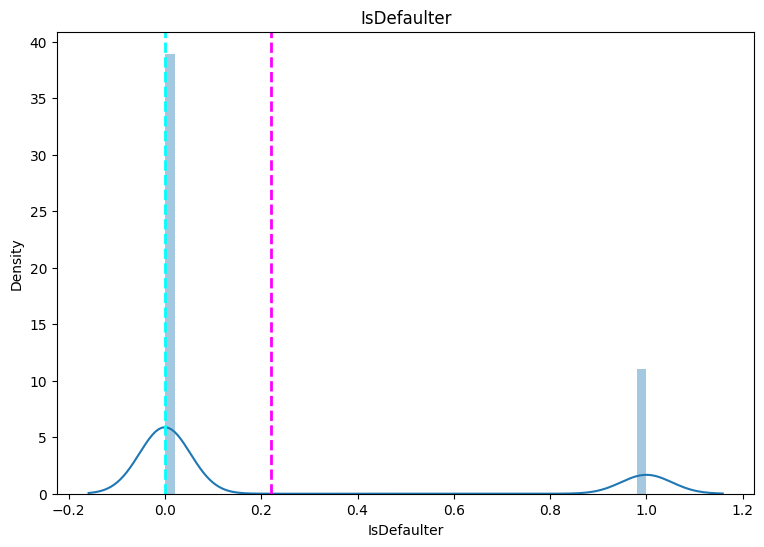

In [58]:
# Transform the data
# Check distribution  of all independent features
for col in df.describe().columns:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  sns.distplot(df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

**6.Handling Imbalanced Dataset**

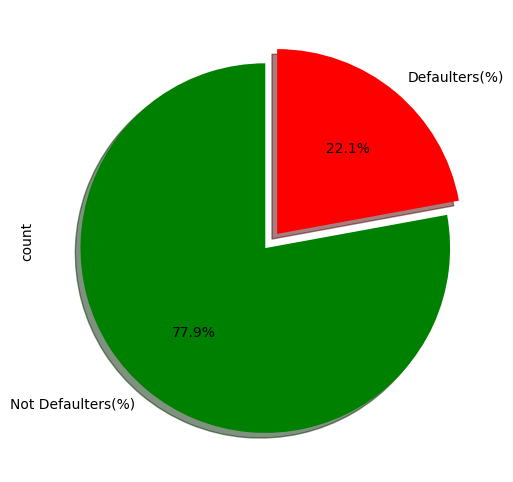

In [59]:
# Handling Imbalanced Dataset (If needed)
#split dependent and indipendent variable
y=df['IsDefaulter']
X=df.drop(['IsDefaulter'],axis=1)


#Visualisation of class imbalance
y.value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Defaulters(%)','Defaulters(%)'],
                               colors=['green','red'],
                               explode=[.05,.05]
                              )
plt.show()


In [60]:
# Handling Imbalanced Dataset (If needed)
# importing SMOTE
from imblearn.over_sampling import SMOTE

print('Dataset Before:\n', y.value_counts())
smt = SMOTE(random_state=40)

# fit predictor and target variable
X_smt, y_smt = smt.fit_resample(X,y)

print('\nDataset After:\n',y_smt.value_counts())

Dataset Before:
 IsDefaulter
0    23364
1     6636
Name: count, dtype: int64

Dataset After:
 IsDefaulter
1    23364
0    23364
Name: count, dtype: int64


The technique used to handle the imbalanced dataset is SMOTE (Synthetic Minority Over-sampling Technique). SMOTE is a popular method for addressing class imbalance in datasets, which is common in many machine learning problems. It works by generating synthetic examples for the minority class to balance the class distribution.

Here is a breakdown of how SMOTE works:

* Select a Minority Sample: SMOTE begins by selecting a sample from the minority class as the input vector.

* Find Nearest Neighbors: It then identifies the k nearest neighbors (based on the distance between data points). The number of neighbors, k, is a parameter that can be set.

* Generate Synthetic Points: A synthetic data point is generated by selecting one of the k nearest neighbors and drawing a new point along the line connecting the input sample and its neighbor. This new point lies in the feature space between the two samples, thereby augmenting the minority class.

* Repeat: This process is repeated for other minority class samples until the dataset reaches a balanced state between the classes.

The reason for using SMOTE is that imbalanced datasets can lead to models that are biased towards the majority class, affecting their performance, especially in classification tasks. By generating synthetic data points for the minority class, SMOTE helps to balance the class distribution and improve the model’s ability to learn from both classes, ultimately leading to better generalization and performance on imbalanced datasets.

**7.Data Splitting**

In [61]:
from sklearn.model_selection import train_test_split
# Split your data to train and test. Choose Splitting ratio wisely.
X_train,X_test,y_train,y_test=train_test_split(X_smt,y_smt,test_size=0.25,random_state=0)

#Checking the shape of
print(X_train.shape,y_train.shape)
# Check the shape of test dataset
print(X_test.shape, y_test.shape)


(35046, 29) (35046,)
(11682, 29) (11682,)


**8.Data Scaling**

In [62]:
from sklearn.preprocessing import StandardScaler
# Scaling your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [63]:
!pip install colorama

In [65]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)

    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

**ML MODEL IMPLEMENTATION**

In [66]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load your data and split into features (X) and target (y)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled,y_train)

# Generate predicted probabilities
predicted_probabilities = model.predict_proba(X_train_scaled)[:, 1]

# Combine predicted probabilities with true labels
results_df = pd.DataFrame({'PredictedProb': predicted_probabilities, 'TrueLabel': y_train})
(results_df)


,PredictedProb,TrueLabel
37126,0.999998,1
4990,0.333526,0
7273,0.235984,0
15568,0.196918,0
45464,0.997962,1
...,...,...
21243,0.038216,0
45891,0.999999,1
42613,0.144457,1
43567,1.000000,1


In [67]:
#create an empty dataframe with columns name of metric chart
metrics_df=pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','KS_Stat'])
def metric_score(model_name,y_test,y_pred_test,y_proba):
  '''
  This Function will detremine model evalation metrics with a dataframe
  '''
  #accuracy
  acc = accuracy_score(y_test, y_pred_test)
  #precision
  prec = precision_score(y_test, y_pred_test)
  #recall
  rec = recall_score(y_test,y_pred_test)
  #f1-score
  f1 = f1_score(y_test, y_pred_test)
  #create a dataframe for ks stat calculation
  df = pd.DataFrame()
  df['real'] = y_test
  df['proba'] = y_proba[:, 1]

   # Recover each class
  class0 = df[df['real'] == 0]
  class1 = df[df['real'] == 1]

  ks = ks_2samp(class0['proba'], class1['proba'])
  stat=round(ks[0],3)
  #dataframe of all metric score

  eval_metrics_list =[model_name, acc,prec,rec, f1,stat]
  metrics_df.loc[len(metrics_df)]=eval_metrics_list
  return metrics_df


**ML Model-1: Logistic Regression**

In [68]:
model_lr = LogisticRegression(fit_intercept= True,max_iter=1000)

# Fit the Algorithm
model_lr.fit(X_train_scaled,y_train)
#Cheking model coefficient
print("The Coefficients obtain from logisticregression model",model_lr.coef_)
# Checking the intercept value
print("The Coefficients obtain from logisticregression model",model_lr.intercept_)
# Predict on the model
#predicting the probabilities of test data
lr_train_proba=model_lr.predict_proba(X_train_scaled)
lr_test_proba=model_lr.predict_proba(X_test_scaled)
#predicitng the values from y from x values
y_pred_test = model_lr.predict(X_test_scaled)
y_pred_train = model_lr.predict(X_train_scaled)


print((lr_train_proba)[:,1])
print(y_pred_train[0])

The Coefficients obtain from logisticregression model [[-0.06514915  0.03687548  0.63778892  0.09579452  0.09655467  0.01450756
   0.06021932 -0.00536681 -0.45134042  0.07960373  0.2346128  -0.04335505
   0.03524387  0.07143469 -0.25363659 -0.33399692 -0.01353964 -0.06455275
  -0.08639334 -0.0288751  -3.44761756 -3.18113781 -3.23708612 -2.42274843
  -3.58169512 -0.86830476 -3.32743015 -3.51152081 -0.66495816]]
The Coefficients obtain from logisticregression model [2.8306074]
[0.99999803 0.33352606 0.23598428 ... 0.14445669 1.         0.26092795]
1


In [69]:
mydf = ks(data=results_df,target="TrueLabel", prob="PredictedProb")

            min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                       
1       9.999988e-01  1.000000    3505          0     20.06%         0.00%   
2       9.994567e-01  0.999999    3504          0     20.06%         0.00%   
3       9.953427e-01  0.999457    3505          0     20.06%         0.00%   
4       4.916264e-01  0.995333    2619        885     14.99%         5.03%   
5       3.157717e-01  0.491552    1358       2147      7.77%        12.21%   
6       2.695643e-01  0.315671     764       2740      4.37%        15.59%   
7       2.262310e-01  0.269552     628       2877      3.59%        16.37%   
8       1.686691e-01  0.226223     607       2897      3.47%        16.48%   
9       1.027385e-01  0.168652     578       2927      3.31%        16.65%   
10      9.960004e-19  0.102666     401       3104      2.30%        17.66%   

       cum_eventrate cum_noneventrate    KS  
Decile           

**ML Model Used: Logistic Regression**

Logistic Regression is a classification algorithm that uses supervised learning to predict the likelihood of a target variable. The dependent variable in this case is binary, with possible outcomes of either 1 (success/yes) or 0 (failure/no). The model calculates the probability of an event occurring (P(Y=1)) as a function of the input variables, making it a suitable choice for problems such as spam detection, disease prediction, or loan default prediction.

Performance Evaluation Using Metrics:

**Accuracy**:

* Formula: Accuracy = (Number of Correct Predictions) / (Total Predictions)
* Explanation: Accuracy measures the proportion of correct predictions out of all the predictions made by the model. While accuracy is useful, it can be misleading in cases of class imbalance (when one class is much more frequent than the other).

**Precision**:
* Formula: Precision = TP / (TP + FP)
* Explanation: Precision is the number of true positives (correctly predicted positive cases) divided by the sum of true positives and false positives. Precision is crucial when the cost of false positives is high, such as in scenarios where a false positive result could lead to unnecessary interventions.

**Recall**:

* Formula: Recall = TP / (TP + FN)
* Explanation: Recall, also known as Sensitivity, is the number of true positives divided by the sum of true positives and false negatives. Recall is particularly important when the cost of false negatives is high, like in medical diagnosis or fraud detection, where failing to identify a positive case could have serious consequences. In this scenario, recall is prioritized to minimize false negatives, which could lead to significant losses (e.g., missing a defaulting customer).

**F1-Score**:

* Formula: F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
* Explanation: The F1-score is the harmonic mean of precision and recall. It is useful when seeking a balance between both precision and recall, especially in cases where there is an imbalance between the classes.

**AUC-ROC**:

*
* Explanation: The Receiver Operating Characteristic (ROC) curve evaluates the performance of a classification model by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. The Area Under the Curve (AUC) is a summary metric that represents the model's ability to distinguish between positive and negative classes. A higher AUC indicates better model performance.

**KS-Plot (Kolmogorov-Smirnov Chart)**:

* Explanation: The KS-plot measures the degree of separation between the positive and negative distributions. It helps assess how well the model distinguishes between the two classes. A higher KS statistic indicates better model performance, as it shows that the model has successfully differentiated between the classes.

**Primary Metric for Evaluation: Recall**

Recall is the primary evaluation metric used for this model due to its importance in minimizing False Negatives. In this context, a False Negative would mean classifying a defaulter as a non-defaulter, which could result in significant financial losses for the bank. By focusing on recall, the model aims to identify as many defaulters as possible, ensuring that no potential defaulter is missed.

In [93]:
!pip install scikit-plot

In [95]:
pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 22.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.
ydata-profiling 4.12.1 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.1 which is incompatible.


In [89]:
from scipy.interpolate import interp1d

In [90]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn import metrics
import scikitplot as skplt
from sklearn.metrics import confusion_matrix

# Define the visualization function
def model_vis(y_train, y_test, y_pred_train, y_pred_test, y_train_proba, y_test_proba):
    '''
    This function helps to visualize the confusion matrix for train and test sets,
    and the KS statistic plot for the train and test sets.
    '''
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))

    # Confusion Matrix for Training Set
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_display_train = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Non-Defaulter', 'Defaulter'])
    cm_display_train.plot(ax=ax[0, 0])
    ax[0, 0].set_title('Confusion Matrix of Training Set Prediction')

    # Confusion Matrix for Test Set
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_display_test = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Non-Defaulter', 'Defaulter'])
    cm_display_test.plot(ax=ax[0, 1])
    ax[0, 1].set_title('Confusion Matrix of Test Set Prediction')

    # KS Chart for Training Set
    skplt.metrics.plot_ks_statistic(y_train, y_train_proba, ax=ax[1, 0])

    # KS Chart for Test Set
    skplt.metrics.plot_ks_statistic(y_test, y_test_proba, ax=ax[1, 1])

    # Show the plots
    plt.show()

# Example usage: visualize the model performance
model_vis(y_train, y_test, y_pred_train, y_pred_test, lr_train_proba, lr_test_proba)

ImportError: cannot import name 'interp' from 'scipy' (/usr/local/lib/python3.10/dist-packages/scipy/__init__.py)